In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import sweetviz as sv
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
twitch_df_X = pd.read_pickle('twitch_df_wrng.pkl')

In [4]:
twitch_df_X.head()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1
2,Age of Empires,1,2016,248884,232,107455,18,40,335.0,0.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,0,0,0,1,0
3,Alien: Isolation,1,2016,264294,11799,9590,42,3968,355.0,16.0,0.05,2016-01-01,2016-02-01,2016-04-01,2016-07-01,109754,122248,0,1,1
4,American Truck Simulator,1,2016,314055,724,43089,48,186,422.0,1.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,2134600,141057,0,1,1


In [5]:
twitch_df_X[twitch_df_X['Hours_watched_1mth'] == 0].count()

Game                  1216
Month                 1216
Year                  1216
Hours_watched         1216
Hours_streamed        1216
Peak_viewers          1216
Peak_channels         1216
Streamers             1216
Avg_viewers           1216
Avg_channels          1216
Avg_channel_ratio     1216
Date                  1216
one_month_future      1216
three_month_future    1216
six_month_future      1216
Hours_watched_1mth    1216
Hours_watched_3mth    1216
Hours_watched_6mth    1216
Jan_Debut_Month       1216
Next_mth_200          1216
dtype: int64

In [6]:
twitch_df_X[(twitch_df_X['Year'] == 2023)].tail()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
1069,The Godfather,3,2023,615938,286,58739,4,61,828.0,0.0,0.00,2023-03-01,2023-04-01,2023-06-01,2023-09-01,0,0,0,0,0
1070,The Last Spell,3,2023,1755759,13402,36579,66,1254,2360.0,18.0,0.01,2023-03-01,2023-04-01,2023-06-01,2023-09-01,0,0,0,0,0
1071,Veiled Experts,3,2023,621189,9266,27928,338,1996,835.0,12.0,0.01,2023-03-01,2023-04-01,2023-06-01,2023-09-01,0,0,0,0,0
1072,WWE 2K23,3,2023,1578307,108024,96829,776,17780,2121.0,145.0,0.07,2023-03-01,2023-04-01,2023-06-01,2023-09-01,0,0,0,0,0
1073,Wo Long: Fallen Dynasty,3,2023,9043403,397223,141387,2410,65966,12155.0,534.0,0.04,2023-03-01,2023-04-01,2023-06-01,2023-09-01,0,0,0,0,0


In [7]:
twitch_df_X = twitch_df_X[twitch_df_X['Date'] != '2023-03-01']

In [8]:
twitch_df_X[(twitch_df_X['Year'] == 2023)].tail()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
892,The Karaoke,2,2023,616683,3343,56256,48,2161,886.0,5.0,0.01,2023-02-01,2023-03-01,2023-05-01,2023-08-01,0,0,0,0,0
893,The Last of Us Part II,2,2023,589640,76836,10584,243,15349,847.0,110.0,0.13,2023-02-01,2023-03-01,2023-05-01,2023-08-01,0,0,0,0,0
894,Tower of Fantasy,2,2023,829657,34395,13929,198,3019,1192.0,49.0,0.04,2023-02-01,2023-03-01,2023-05-01,2023-08-01,0,0,0,0,0
895,Undisputed,2,2023,1066525,24598,69575,173,5066,1532.0,35.0,0.02,2023-02-01,2023-03-01,2023-05-01,2023-08-01,0,0,0,0,0
896,Wild Hearts,2,2023,4637613,132860,76574,845,15433,6663.0,191.0,0.03,2023-02-01,2023-03-01,2023-05-01,2023-08-01,702432,0,0,0,1


In [9]:
'''Baseline model would predict that a game will not be popular the next month after it's debut into the top 200'''

"Baseline model would predict that a game will not be popular the next month after it's debut into the top 200"

In [10]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200']), 
                                                    twitch_df_X.Next_mth_200, test_size=0.25, stratify = twitch_df_X.Next_mth_200,
                                                    random_state=1701)

In [11]:
X_train.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Jan_Debut_Month
1950,1074609,24957,47087,352,5640,1493.0,35.0,0.02,0
1143,214705,4827,44669,23,1587,298.0,7.0,0.02,0
231,366994,37223,3952,120,4770,493.0,50.0,0.10,1
696,178725,3598,10855,18,813,266.0,5.0,0.02,0
1479,318350,3284,50067,42,931,428.0,4.0,0.01,0


In [12]:
c_report = sv.compare([X_train, "Training Data"], [X_test, "Test Data"])

                                             |          | [  0%]   00:00 -> (? left)


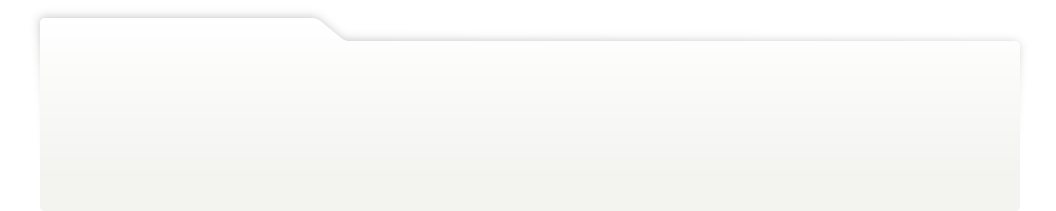
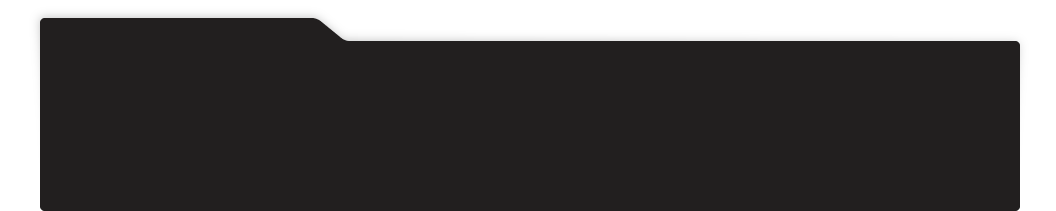
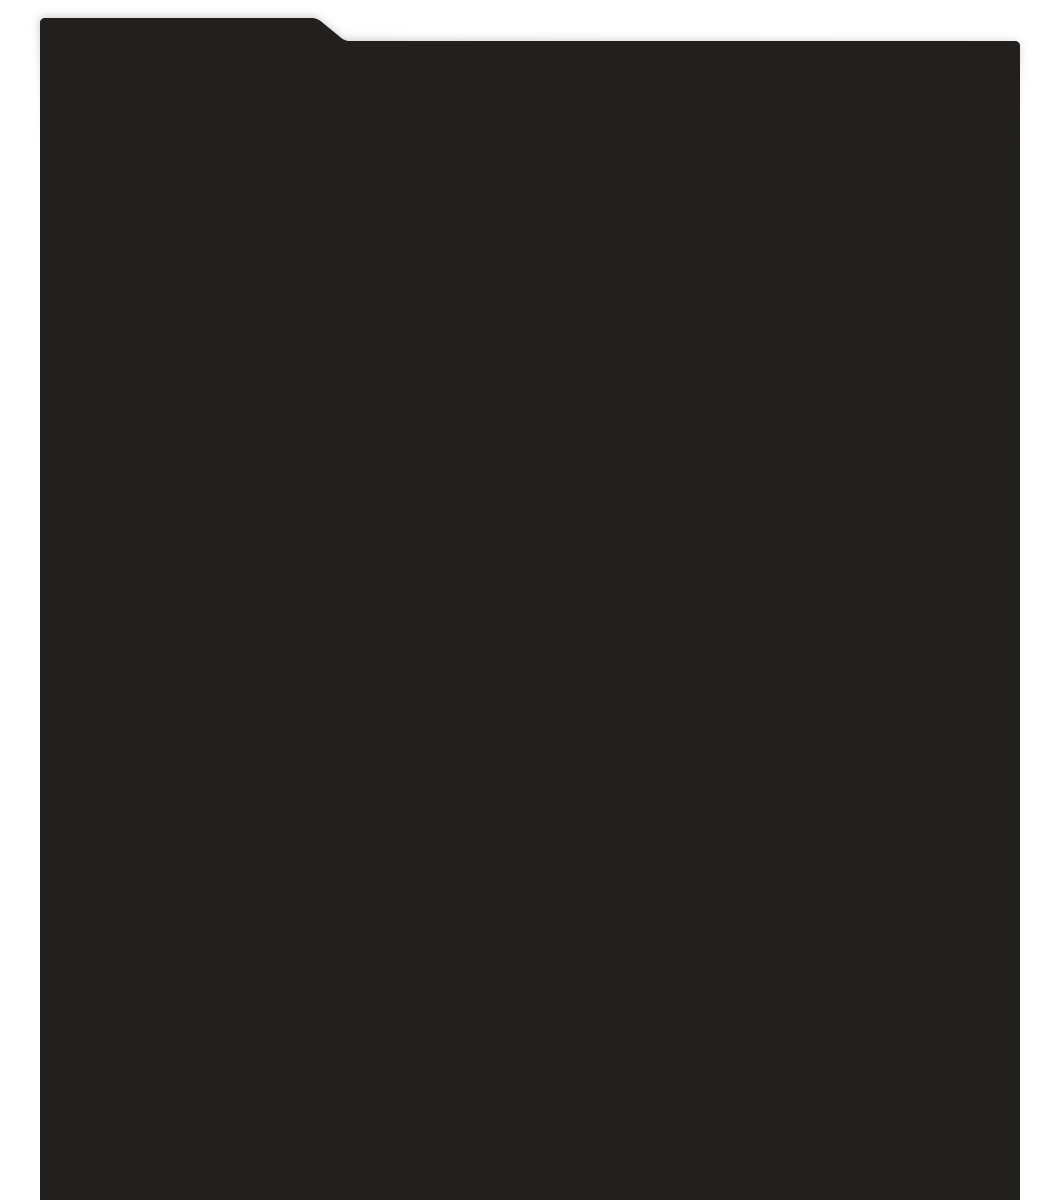
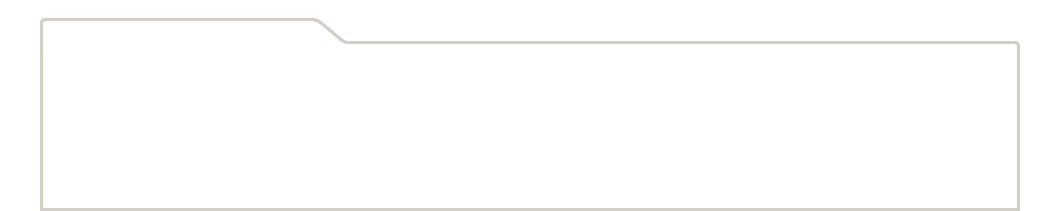
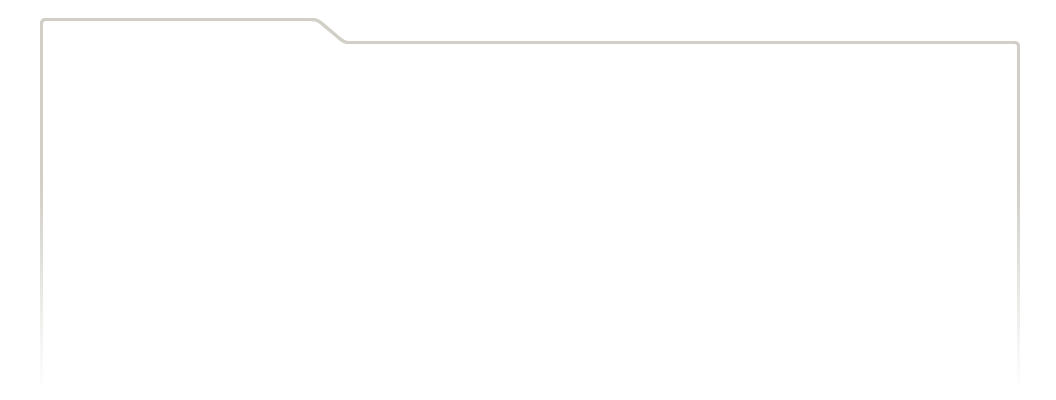
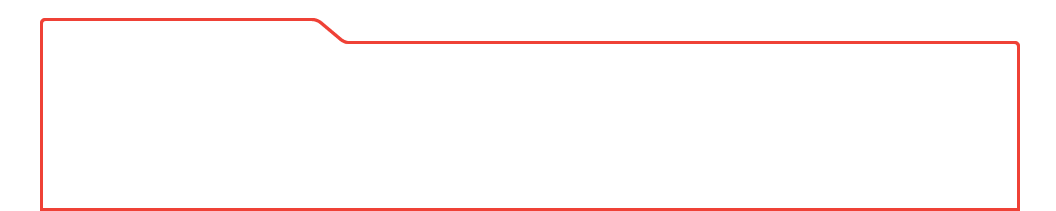
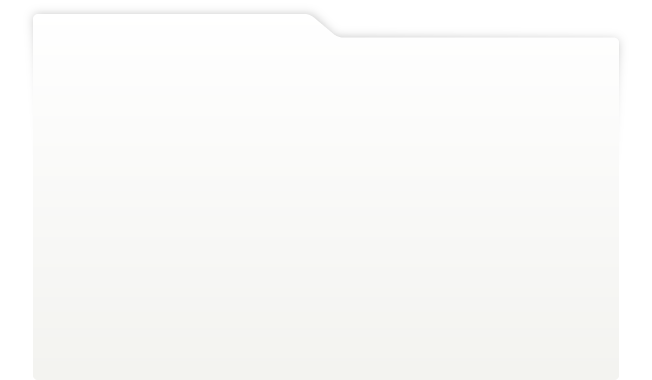
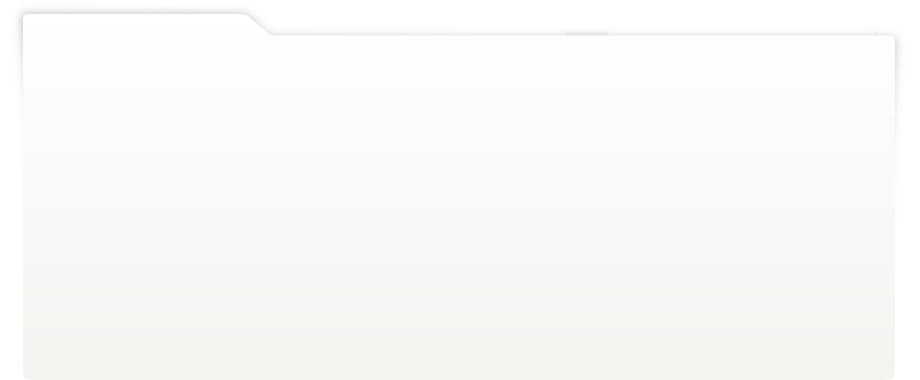
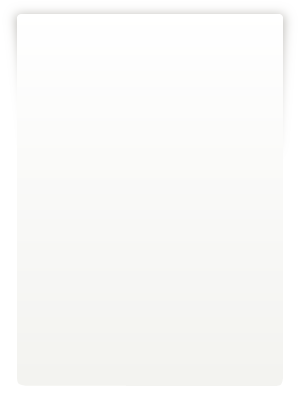
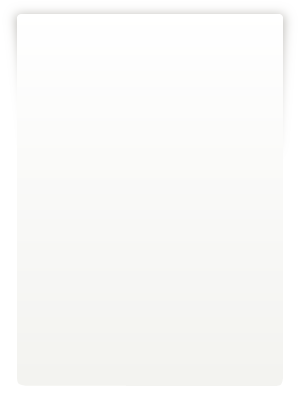
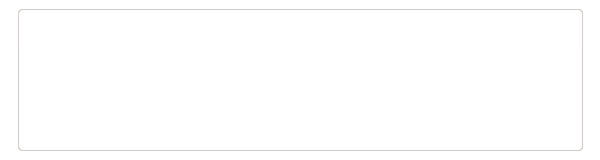
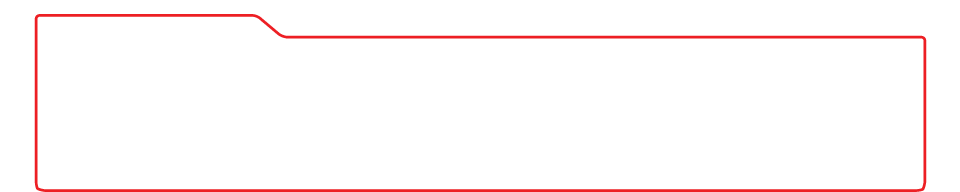
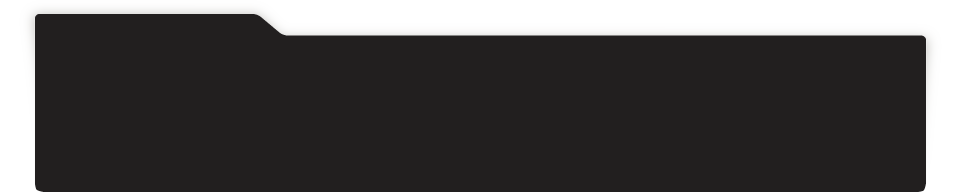
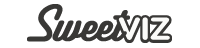
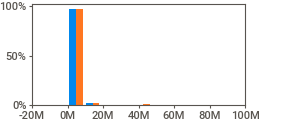
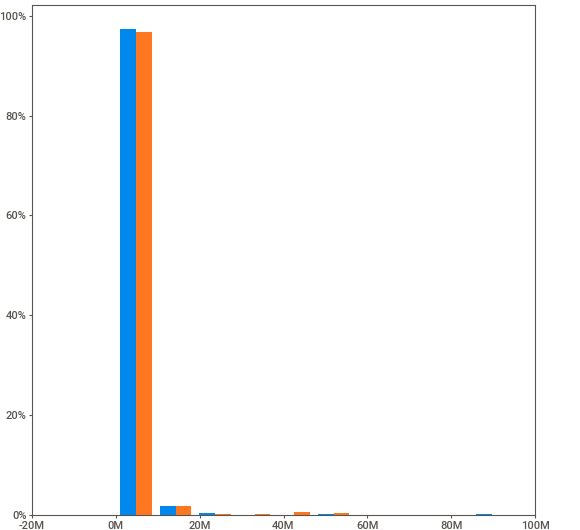
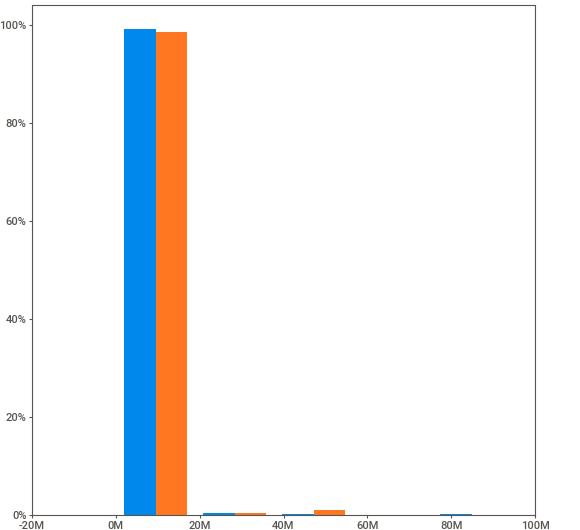
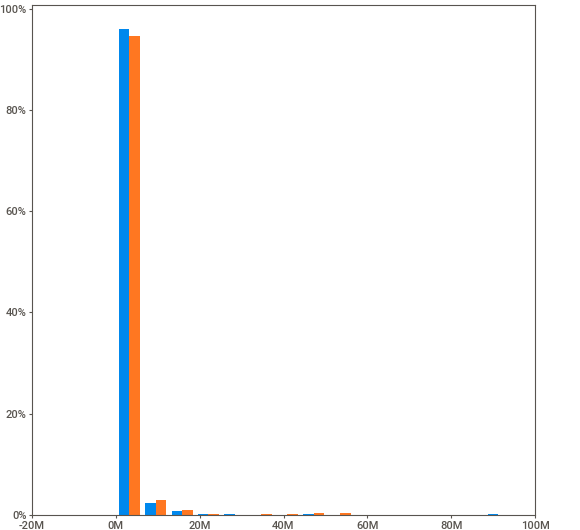
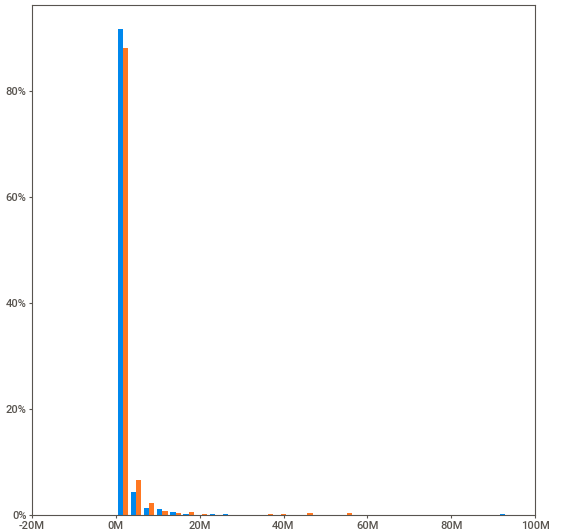
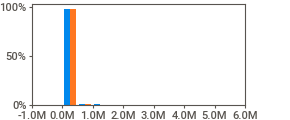
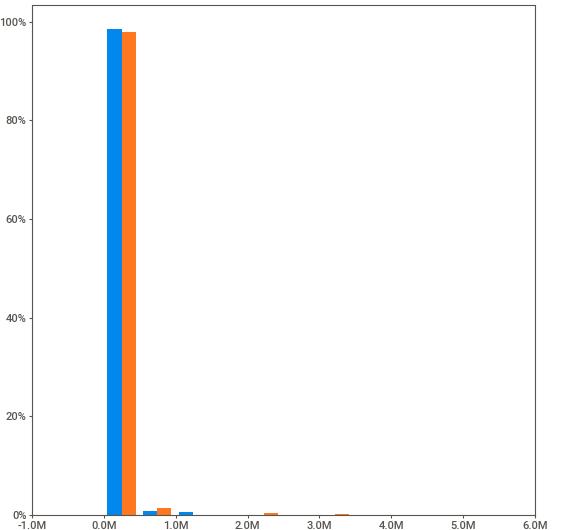
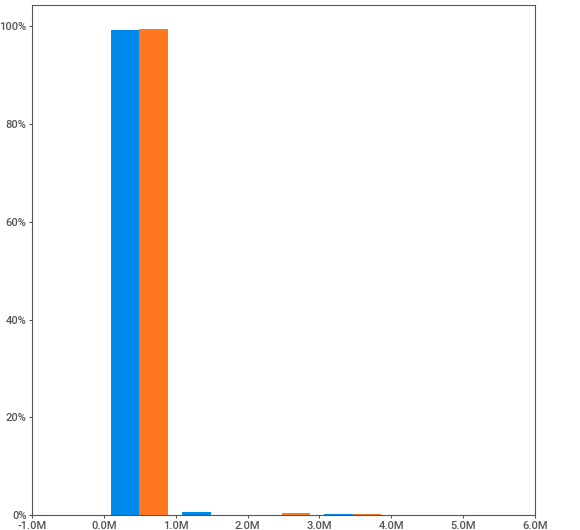
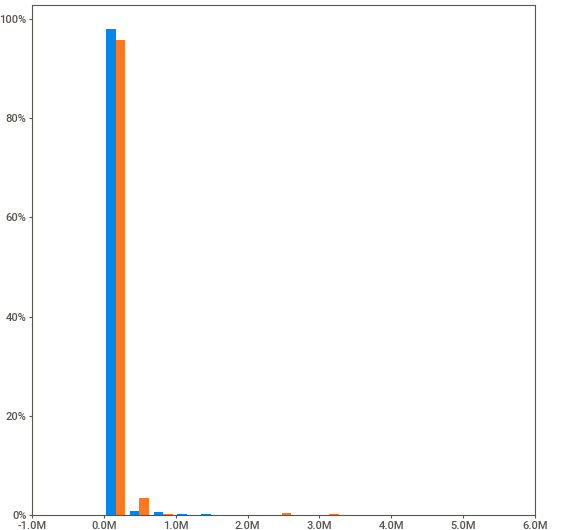
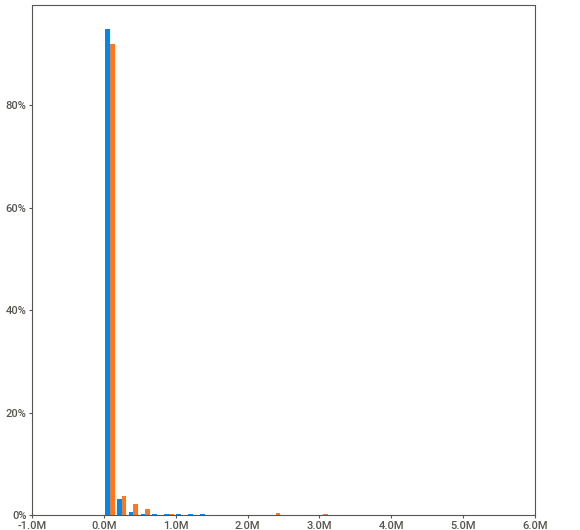
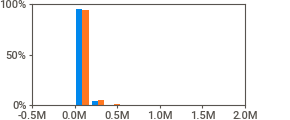
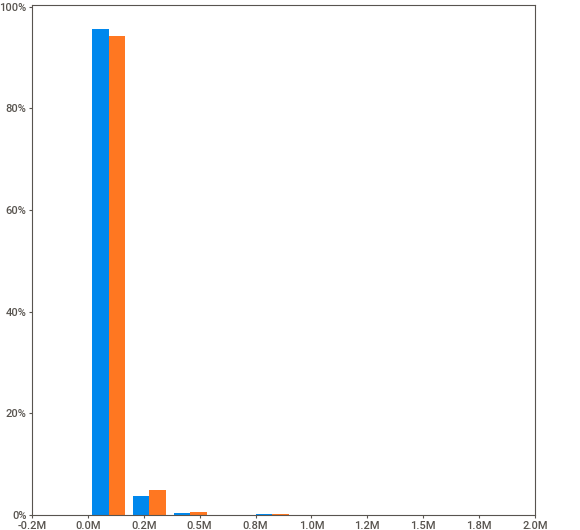
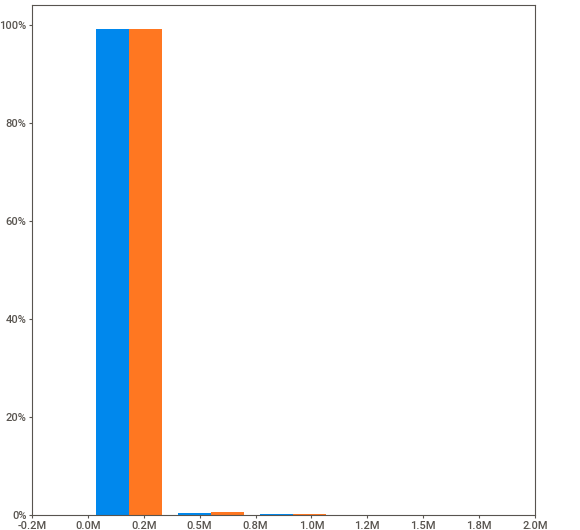
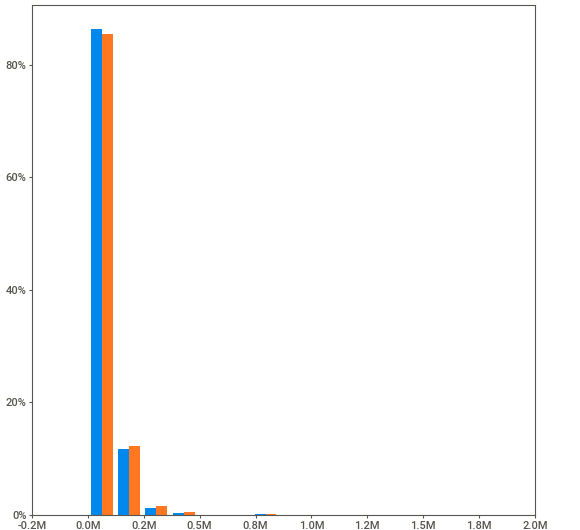
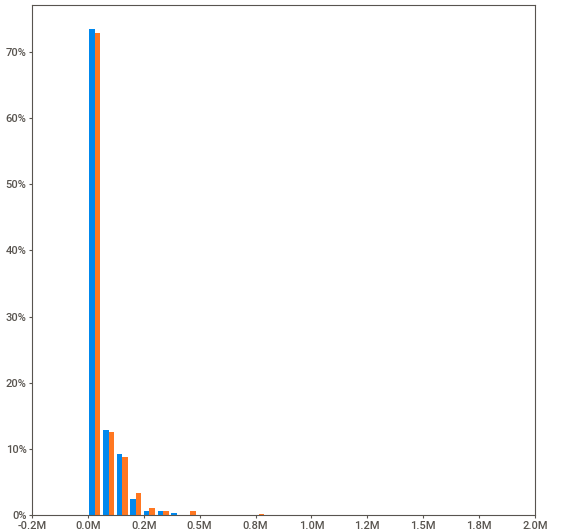
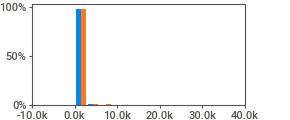
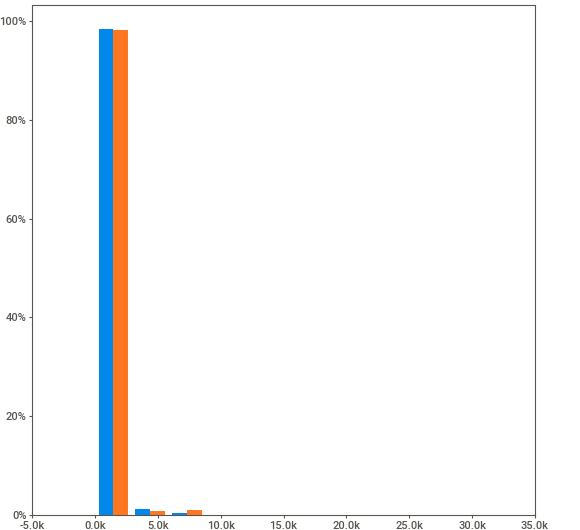
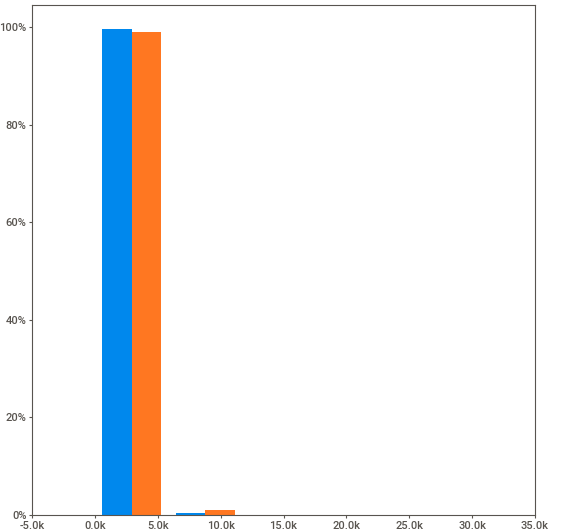
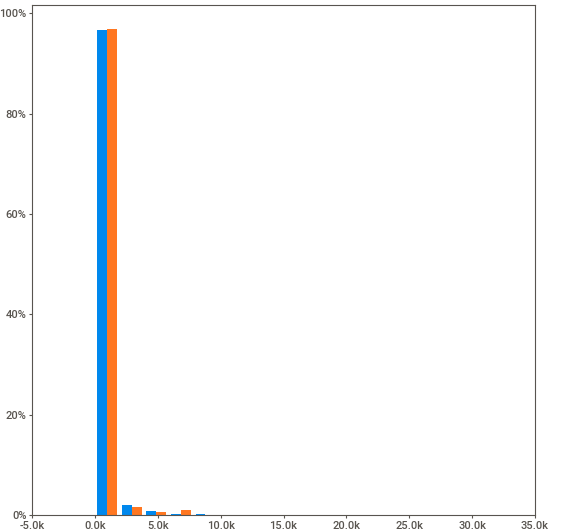
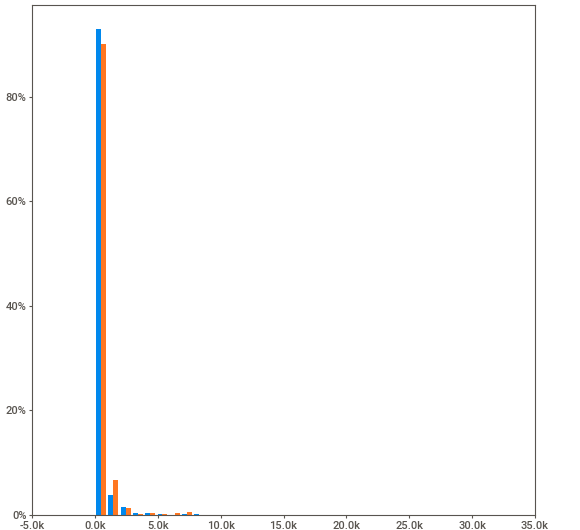
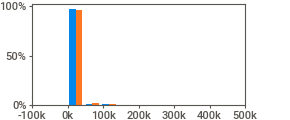
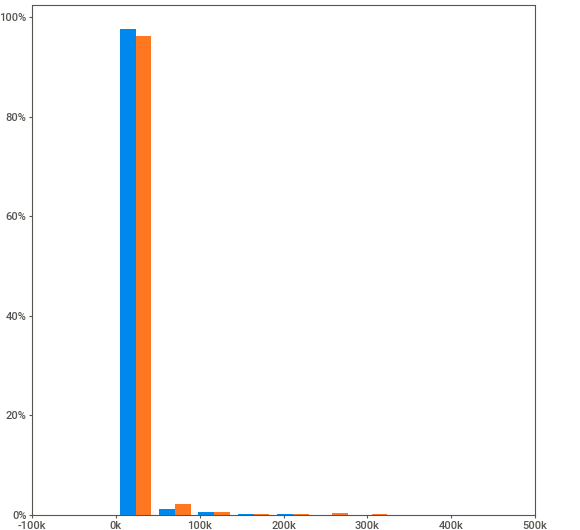
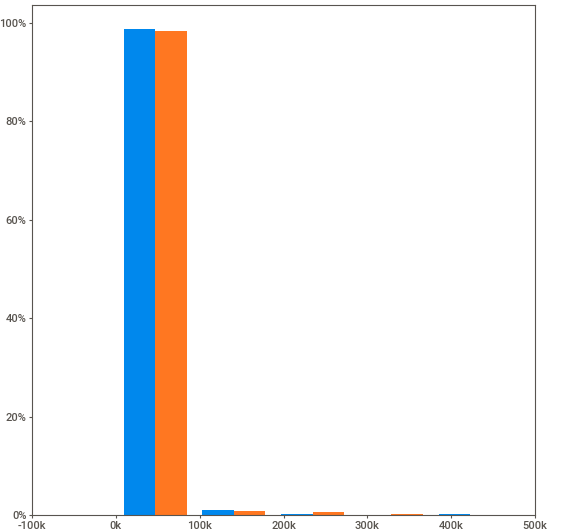
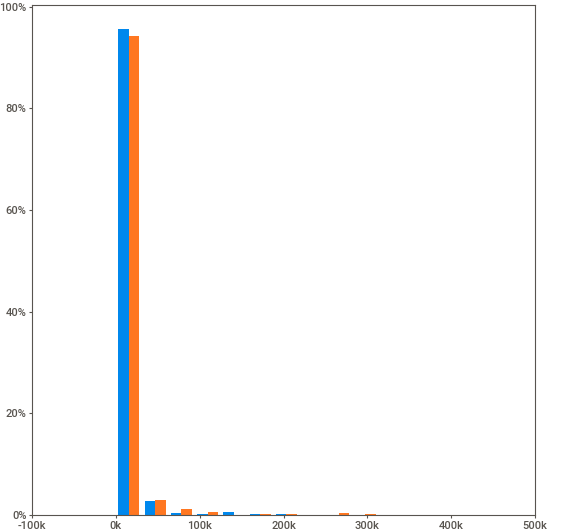
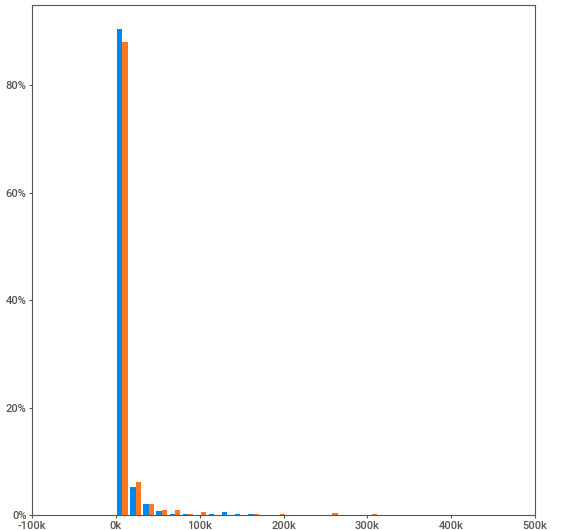
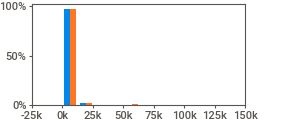
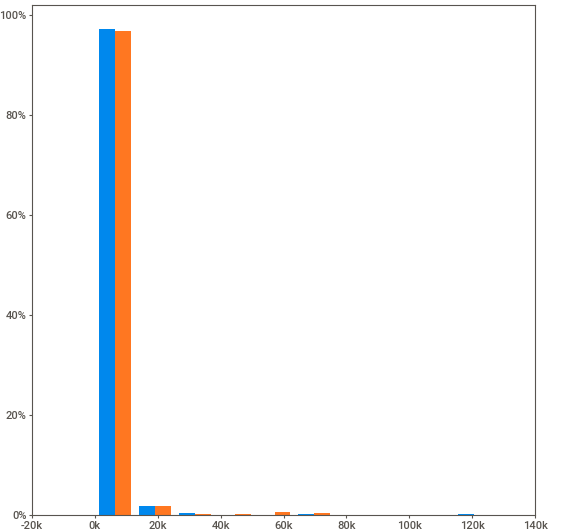
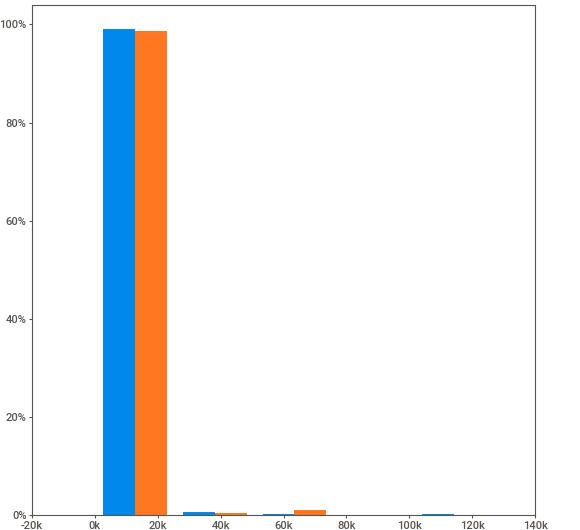
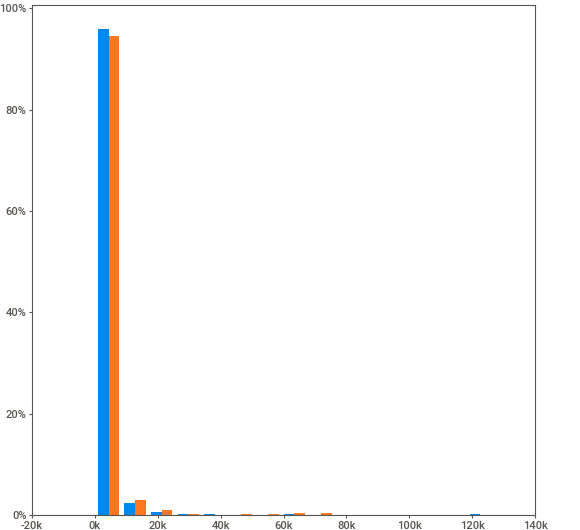
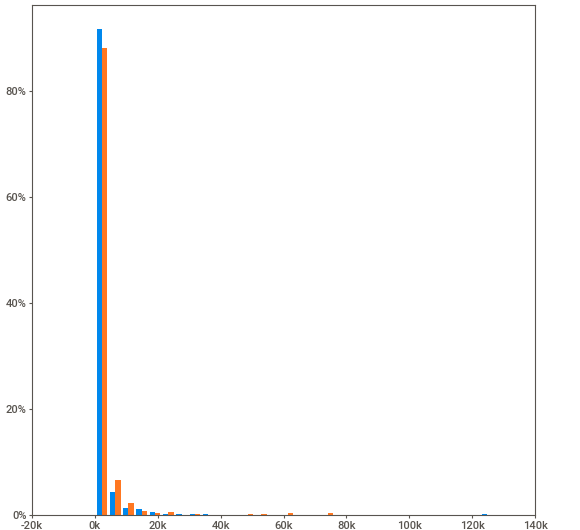
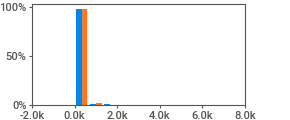
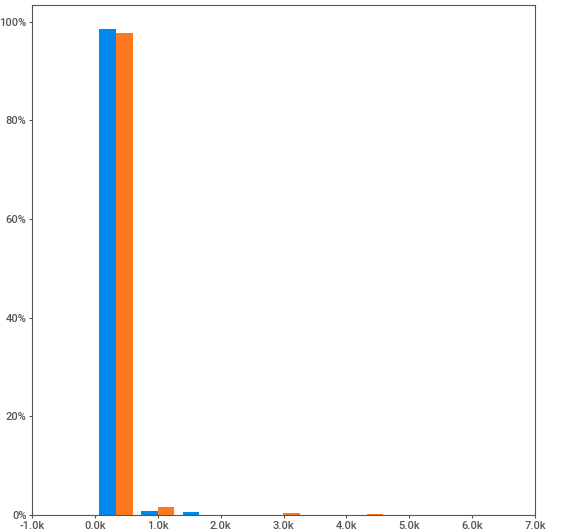
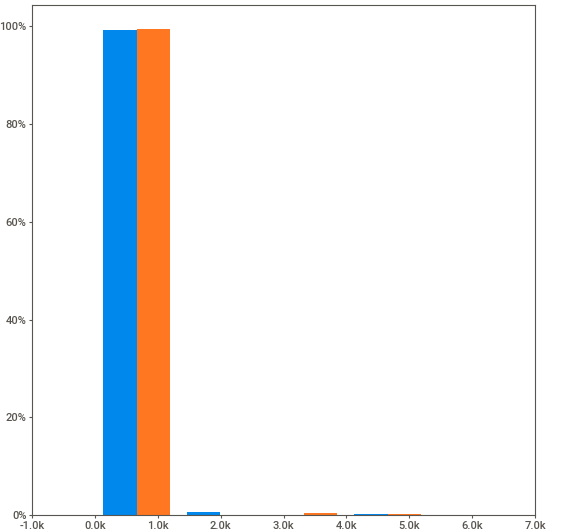
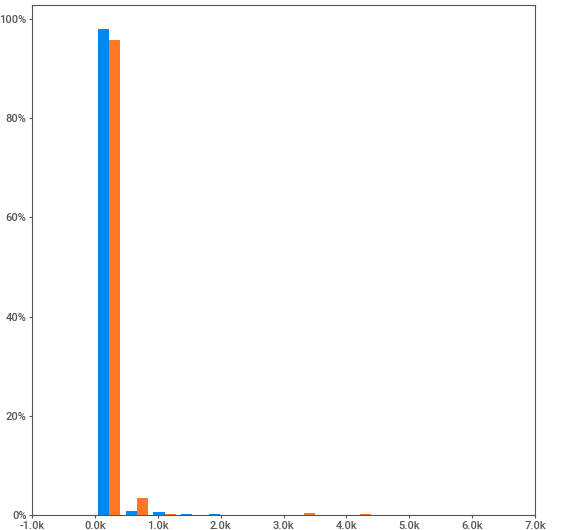
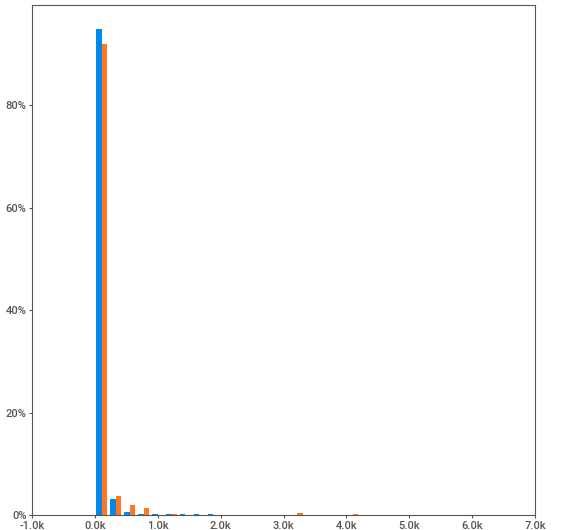
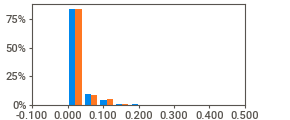
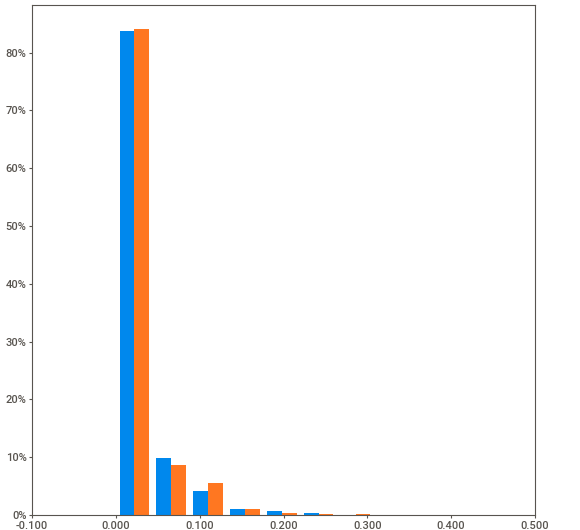
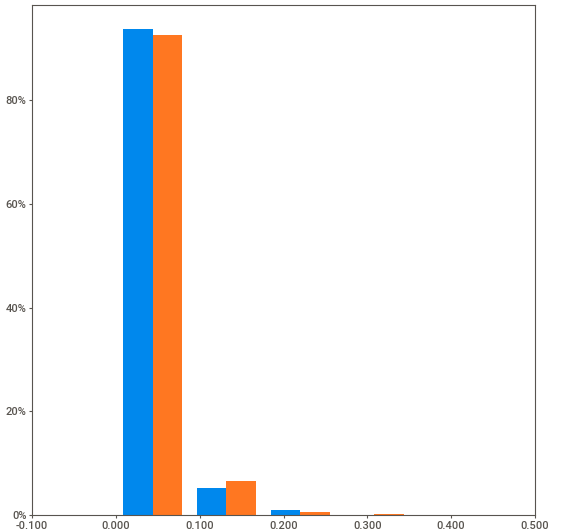
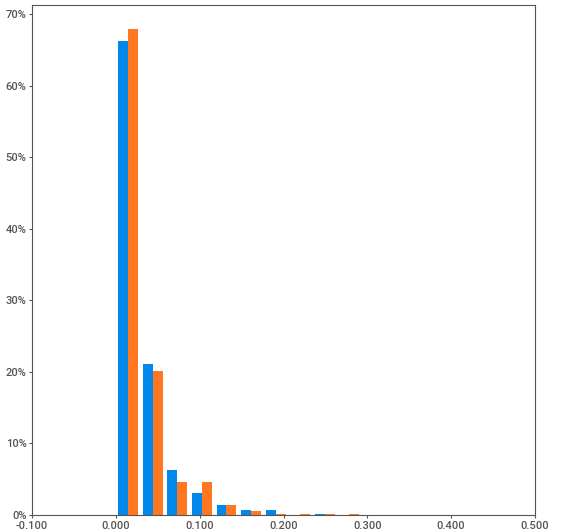
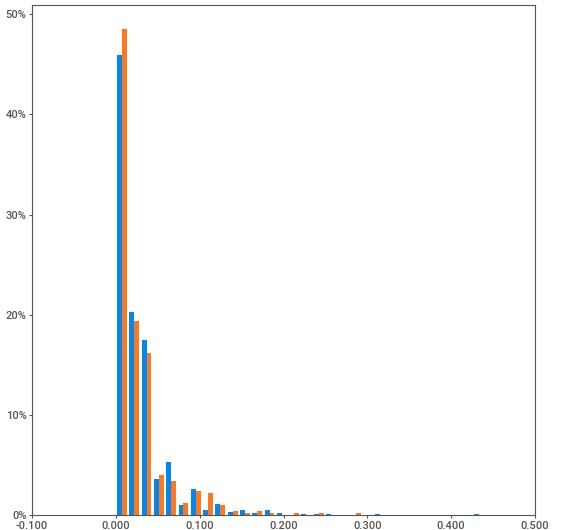
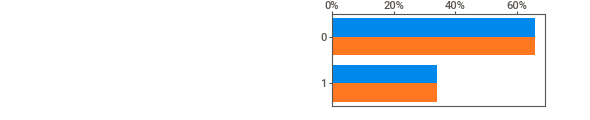
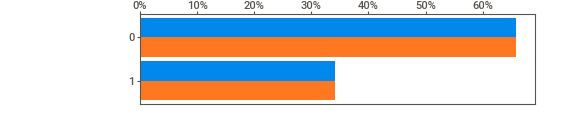
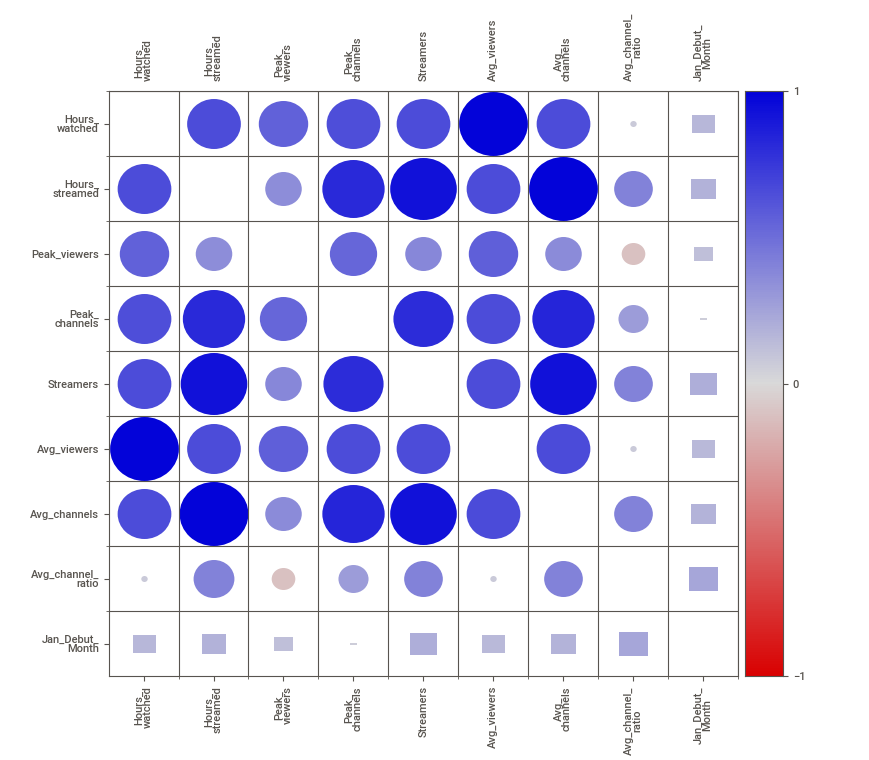
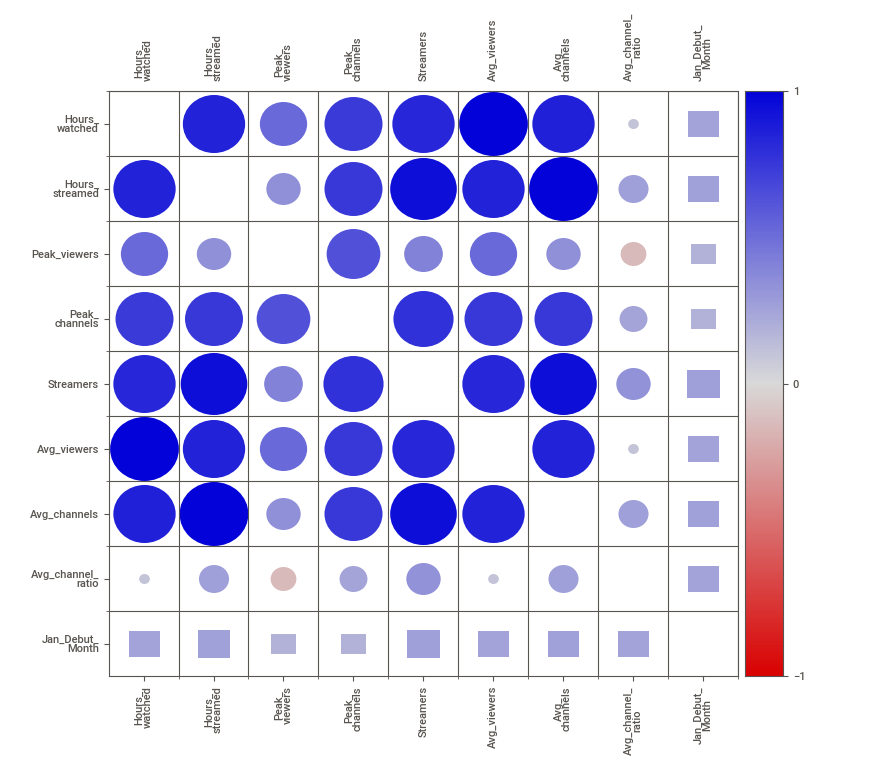

In [13]:
c_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

In [14]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Jan_Debut_Month
0,-0.104183,-0.114826,-0.127525,0.018430,-0.076539,-0.100087,-0.110901,-0.195242,-0.720577
1,-0.264915,-0.207033,-0.153653,-0.278338,-0.234524,-0.264257,-0.204991,-0.195242,-0.720577
2,-0.236449,-0.058641,-0.593625,-0.190841,-0.110451,-0.237468,-0.060495,2.065569,1.387777
3,-0.271640,-0.212662,-0.519034,-0.282849,-0.264694,-0.268653,-0.211711,-0.195242,-0.720577
4,-0.245541,-0.214101,-0.095324,-0.261200,-0.260094,-0.246398,-0.215072,-0.477843,-0.720577


In [15]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
print("score on test: " + str(lr.score(X_test_scaled, y_test)))
print("score on train: "+ str(lr.score(X_train_scaled, y_train)))

score on test: 0.7964071856287425
score on train: 0.7321785476349101


In [17]:
baseline = 1216/2025
baseline

0.6004938271604938

In [18]:
y_pred_test_lr = lr.predict(X_test_scaled)
y_pred_train_lr = lr.predict(X_train_scaled)

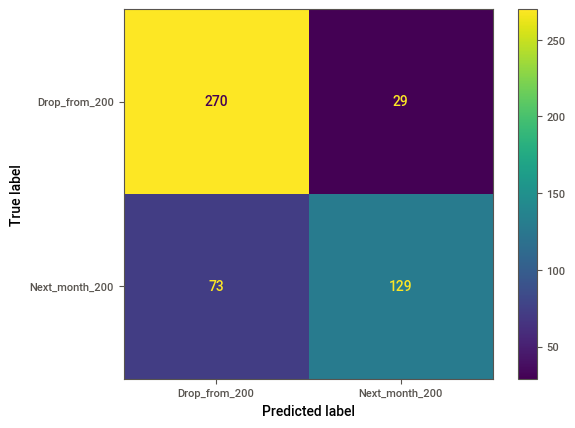

In [19]:
cm = confusion_matrix(y_test, y_pred_test_lr, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [20]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       299
           1       0.82      0.64      0.72       202

    accuracy                           0.80       501
   macro avg       0.80      0.77      0.78       501
weighted avg       0.80      0.80      0.79       501



In [21]:
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[::,1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  y_pred_proba_lr)

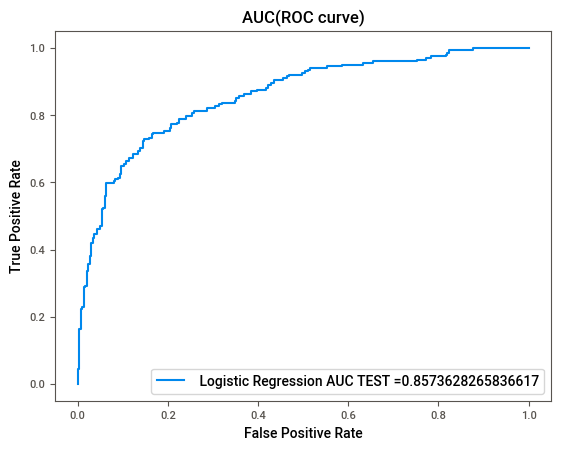

In [22]:
plt.plot(fpr_lr, tpr_lr, label=" Logistic Regression AUC TEST ="+str(auc(fpr_lr, tpr_lr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [23]:
y_pred_thresh = (lr.predict_proba(X_test_scaled)[:, 1] > .4).astype('float')

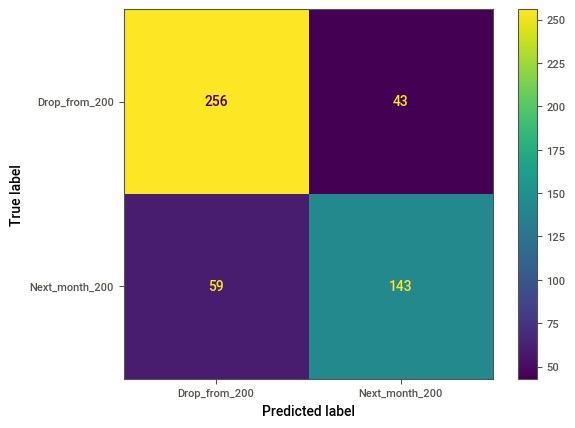

In [24]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [25]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       299
           1       0.77      0.71      0.74       202

    accuracy                           0.80       501
   macro avg       0.79      0.78      0.79       501
weighted avg       0.80      0.80      0.79       501



In [26]:
rf = RandomForestClassifier(random_state = 1701)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1701)

In [27]:
print("score on test: " + str(rf.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf.score(X_train_scaled, y_train)))

score on test: 0.7684630738522954
score on train: 1.0


In [28]:
random_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100],
 'random_state': [1701]}

In [29]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [30]:
rf_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [31]:
print("score on test: " + str(rf_random.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_random.score(X_train_scaled, y_train)))

score on test: 0.7884231536926147
score on train: 0.8314457028647568


In [32]:
rf_random.best_params_


{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 7}

In [33]:
param_grid = {
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100]}

In [34]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [35]:
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [36]:
print("score on test: " + str(rf_grid.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_grid.score(X_train_scaled, y_train)))

score on test: 0.7884231536926147
score on train: 0.8314457028647568


In [37]:
rf_grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100}

In [38]:
rf_nest_2000 = RandomForestClassifier(max_depth = 3, min_samples_leaf = 5, n_estimators = 2000)

In [39]:
rf_nest_2000.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=2000)

In [40]:
print("score on test: " + str(rf_nest_2000.score(X_test_scaled, y_test)))
print("score on train: "+ str(rf_nest_2000.score(X_train_scaled, y_train)))

score on test: 0.7944111776447106
score on train: 0.7501665556295802


In [41]:
importances = rf_nest_2000.feature_importances_

In [42]:
rf_importances = pd.Series(importances, index = X_test_scaled.columns)
rf_importances = rf_importances.sort_values(ascending = False)


In [43]:
rf_importances.head(10)

Hours_streamed       0.248616
Avg_channels         0.194126
Jan_Debut_Month      0.139691
Hours_watched        0.106515
Streamers            0.098981
Avg_viewers          0.096568
Peak_channels        0.064898
Peak_viewers         0.041472
Avg_channel_ratio    0.009132
dtype: float64

In [44]:
y_pred_proba_rf = rf_grid.predict_proba(X_test_scaled)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)

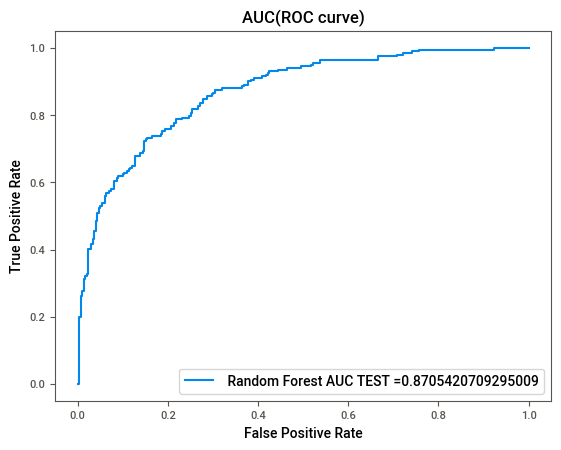

In [45]:
plt.plot(fpr_rf, tpr_rf, label=" Random Forest AUC TEST ="+str(auc(fpr_rf, tpr_rf)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [46]:
y_pred_test_rf = rf_grid.predict(X_test_scaled)

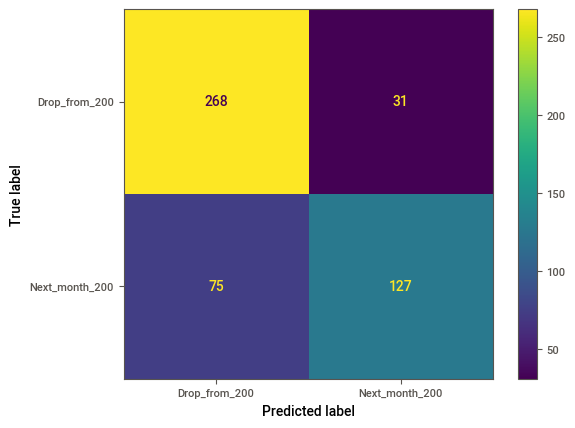

In [47]:
cm = confusion_matrix(y_test, y_pred_test_rf, labels = rf_grid.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [48]:
y_pred_thresh = (rf_grid.predict_proba(X_test_scaled)[:, 1] > .45).astype('float')

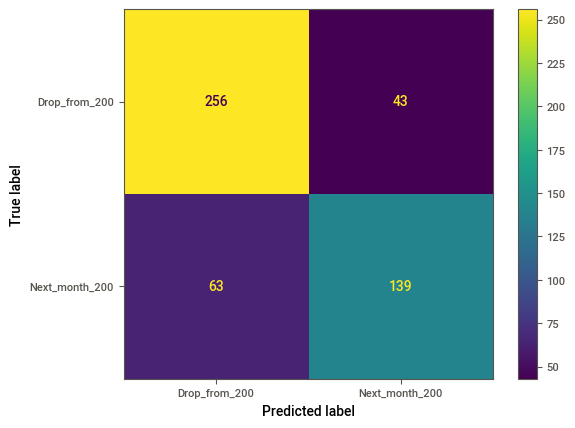

In [49]:
cm = confusion_matrix(y_test, y_pred_thresh, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Drop_from_200', 'Next_month_200'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
ax.set_yticklabels(labels = ['Drop_from_200', 'Next_month_200'], fontsize = 8)
display_cm.plot(ax = ax)

In [50]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       299
           1       0.76      0.69      0.72       202

    accuracy                           0.79       501
   macro avg       0.78      0.77      0.78       501
weighted avg       0.79      0.79      0.79       501



In [51]:
twitch_df_X_3mth = twitch_df_X[twitch_df_X['Date'] < '2022-12-12']

In [52]:
twitch_df_X_3mth.tail()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
2020,Ixion,12,2022,1035038,9529,47595,142,1251,1391.0,13.0,0.01,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2021,Marvel's Midnight Suns,12,2022,1986127,54569,27336,290,5128,2670.0,73.0,0.03,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2022,Project: Playtime,12,2022,699293,23731,141061,264,12707,940.0,32.0,0.03,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2023,Stalcraft,12,2022,1461144,29178,11735,113,3980,1964.0,39.0,0.02,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0
2024,The Callisto Protocol,12,2022,8703710,215971,267668,2598,37504,11699.0,290.0,0.02,2022-12-01,2023-01-01,2023-03-01,2023-06-01,0,0,0,0,0


In [53]:
twitch_df_X_3mth.count()

Game                  1922
Month                 1922
Year                  1922
Hours_watched         1922
Hours_streamed        1922
Peak_viewers          1922
Peak_channels         1922
Streamers             1922
Avg_viewers           1922
Avg_channels          1922
Avg_channel_ratio     1922
Date                  1922
one_month_future      1922
three_month_future    1922
six_month_future      1922
Hours_watched_1mth    1922
Hours_watched_3mth    1922
Hours_watched_6mth    1922
Jan_Debut_Month       1922
Next_mth_200          1922
dtype: int64

In [54]:
twitch_df_X_3mth.reset_index(drop = True, inplace = True)

In [55]:
x = len(twitch_df_X_3mth)
top200_list_3mth = []
for i in range(x):
    if twitch_df_X_3mth['Hours_watched_3mth'][i] != 0:
        top200_list_3mth.append(1)
    else:
        top200_list_3mth.append(0)

In [56]:
twitch_df_X_3mth['three_mth_200'] = top200_list_3mth

In [57]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X_3mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth','Hours_watched_6mth', 'Next_mth_200', 
                                                                             'three_mth_200']), 
                                                    twitch_df_X_3mth.three_mth_200, test_size=0.25, stratify = twitch_df_X_3mth.three_mth_200,
                                                    random_state=1701)

In [58]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [59]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [60]:
print("score on test: " + str(rf_random.score(X_test, y_test)))
print("score on train: "+ str(rf_random.score(X_train, y_train)))

score on test: 0.9043659043659044
score on train: 0.9243580846634282


In [61]:
rf_random.best_params_

{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 7}

In [62]:
rf_3mth = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, n_estimators = 2000, random_state = 1701)

In [63]:
rf_3mth.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=2000,
                       random_state=1701)

In [64]:
print("score on test: " + str(rf_3mth.score(X_test, y_test)))
print("score on train: "+ str(rf_3mth.score(X_train, y_train)))

score on test: 0.9085239085239085
score on train: 0.919500346981263


In [65]:
importances = rf_3mth.feature_importances_

In [66]:
rf_importances = pd.Series(importances, index = X_test.columns)
rf_importances = rf_importances.sort_values(ascending = False)

In [67]:
rf_importances

Hours_watched_1mth    0.331403
Jan_Debut_Month       0.249775
Hours_streamed        0.085384
Avg_channels          0.065954
Peak_viewers          0.062704
Streamers             0.052682
Peak_channels         0.048858
Hours_watched         0.044208
Avg_viewers           0.039029
Avg_channel_ratio     0.020004
dtype: float64

In [68]:
twitch_df_X_6mth = twitch_df_X[twitch_df_X['Date'] < '2022-09-01']

In [69]:
twitch_df_X_6mth.reset_index(drop = True, inplace = True)

In [70]:
x = len(twitch_df_X_6mth)
top200_list_6mth = []
for i in range(x):
    if twitch_df_X_6mth['Hours_watched_3mth'][i] != 0:
        top200_list_6mth.append(1)
    else:
        top200_list_6mth.append(0)

In [71]:
twitch_df_X_6mth['six_mth_200'] = top200_list_6mth

In [72]:
X_train, X_test, y_train, y_test = train_test_split(twitch_df_X_6mth.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_6mth', 'Next_mth_200', 
                                                                             'six_mth_200']), 
                                                    twitch_df_X_6mth.six_mth_200, test_size=0.25, stratify = twitch_df_X_6mth.six_mth_200,
                                                    random_state=1701)

In [73]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, random_state=1701)

In [74]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100],
                                        'random_state': [1701]},
                   random_state=1701)

In [75]:
print("score on test: " + str(rf_random.score(X_test, y_test)))
print("score on train: "+ str(rf_random.score(X_train, y_train)))

score on test: 1.0
score on train: 1.0


In [76]:
rf_random.best_params_

{'random_state': 1701,
 'n_estimators': 100,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [77]:
rf_6mth = RandomForestClassifier(max_depth = 3, min_samples_leaf = 5, n_estimators = 100, random_state = 1701)

In [78]:
rf_6mth.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, random_state=1701)

In [79]:
print("score on test: " + str(rf_6mth.score(X_test, y_test)))
print("score on train: "+ str(rf_6mth.score(X_train, y_train)))

score on test: 1.0
score on train: 1.0


In [80]:
importances = rf_6mth.feature_importances_

In [81]:
rf_importances = pd.Series(importances, index = X_test.columns)
rf_importances = rf_importances.sort_values(ascending = False)

In [82]:
rf_importances

Hours_watched_3mth    0.540689
Hours_watched_1mth    0.178670
Jan_Debut_Month       0.130027
Hours_streamed        0.041438
Avg_channels          0.034278
Streamers             0.020543
Hours_watched         0.017023
Peak_viewers          0.013848
Avg_viewers           0.009681
Avg_channel_ratio     0.008304
Peak_channels         0.005498
dtype: float64

In [83]:
no_Jan2016 = twitch_df_X[twitch_df_X['Date'] != '2016-01-01']
no_Jan2016.head(2)

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
200,ARK: Survival Evolved,1,2017,2167646,192501,18756,483,24488,2914.0,259.0,0.09,2017-01-01,2017-02-01,2017-04-01,2017-07-01,1830475,1070666,1259946,1,1
201,ASTRONEER,1,2017,761112,21225,29721,72,4782,1023.0,29.0,0.03,2017-01-01,2017-02-01,2017-04-01,2017-07-01,0,0,0,1,0


In [84]:
X_train, X_test, y_train, y_test = train_test_split(no_Jan2016.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_1mth',
                                                                              'Hours_watched_6mth', 'Next_mth_200']), 
                                                    no_Jan2016.Next_mth_200, test_size=0.25, stratify = no_Jan2016.Next_mth_200,
                                                    random_state=1701)

In [85]:
rf_noJan2016 = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [86]:
rf_noJan2016.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1701),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'n_estimators': [100]})

In [87]:
rf_noJan2016.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 100}

In [88]:
rf_noJan2016 = RandomForestClassifier(max_depth = 7, min_samples_leaf = 10, n_estimators = 100, random_state = 1701)

In [89]:
rf_noJan2016.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=10, random_state=1701)

In [90]:
print("score on test: " + str(rf_noJan2016.score(X_test, y_test)))
print("score on train: "+ str(rf_noJan2016.score(X_train, y_train)))

score on test: 0.753880266075388
score on train: 0.8016284233900814


In [91]:
rf_noJan2016 = RandomForestClassifier(max_depth = 7, min_samples_leaf = 10, n_estimators = 2000, random_state = 1701)

In [92]:
rf_noJan2016.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=10, n_estimators=2000,
                       random_state=1701)

In [93]:
print("score on test: " + str(rf_noJan2016.score(X_test, y_test)))
print("score on train: "+ str(rf_noJan2016.score(X_train, y_train)))


score on test: 0.753880266075388
score on train: 0.8031088082901554


In [94]:
importances = rf_noJan2016.feature_importances_

In [95]:
rf_importances = pd.Series(importances, index = X_test_scaled.columns)
rf_importances = rf_importances.sort_values(ascending = False)

In [96]:
rf_importances

Hours_streamed       0.190421
Avg_channels         0.144244
Avg_viewers          0.142480
Hours_watched        0.134430
Jan_Debut_Month      0.097859
Streamers            0.096632
Peak_channels        0.092431
Peak_viewers         0.080586
Avg_channel_ratio    0.020916
dtype: float64

In [97]:
'''Not a significant enough change to indicate that the beginning time point of the dataset is significantly different from 
the other Jan data. '''

'Not a significant enough change to indicate that the beginning time point of the dataset is significantly different from \nthe other Jan data. '

In [98]:
noz_df = twitch_df_X[twitch_df_X['Hours_watched_1mth'] != 0]

In [99]:
noz_df.head()

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
0,7 Days to Die,1,2016,269681,12131,4405,44,1240,362.0,16.0,0.04,2016-01-01,2016-02-01,2016-04-01,2016-07-01,139365,212199,2063116,1,1
1,Agar.io,1,2016,255617,20705,4183,74,4472,344.0,28.0,0.08,2016-01-01,2016-02-01,2016-04-01,2016-07-01,254146,198757,0,1,1
3,Alien: Isolation,1,2016,264294,11799,9590,42,3968,355.0,16.0,0.05,2016-01-01,2016-02-01,2016-04-01,2016-07-01,109754,122248,0,1,1
4,American Truck Simulator,1,2016,314055,724,43089,48,186,422.0,1.0,0.00,2016-01-01,2016-02-01,2016-04-01,2016-07-01,2134600,141057,0,1,1
6,Arma 3,1,2016,2542838,86219,32132,275,8771,3418.0,116.0,0.03,2016-01-01,2016-02-01,2016-04-01,2016-07-01,2912034,3130387,4422829,1,1


In [100]:
x = noz_df.drop(columns=['Game', 'Month', 'Year', 'Date', 'one_month_future', 
                                                                              'three_month_future','six_month_future',
                                                                              'Hours_watched_3mth', 'Hours_watched_6mth',
                                                                              'Hours_watched_1mth', 'Next_mth_200'])
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    noz_df.Hours_watched_1mth, test_size=0.25, random_state=1701)

In [101]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Jan_Debut_Month
0,-0.256115,-0.319352,-0.272180,-0.330493,-0.403284,-0.256848,-0.314875,-0.696471,-1.013290
1,-0.274355,-0.294672,0.224038,-0.317483,-0.339148,-0.270921,-0.290400,-0.696471,-1.013290
2,-0.297519,-0.115383,-0.270431,0.295264,-0.201626,-0.297627,-0.116351,1.572676,-1.013290
3,-0.121909,-0.240355,0.615694,-0.237475,-0.194777,-0.124755,-0.238729,-0.696471,0.986885
4,-0.286662,-0.053396,-0.602511,-0.247882,-0.144923,-0.286944,-0.056522,1.856319,0.986885


In [102]:
mlr = LinearRegression()

In [103]:
mlr.fit(X_train_scaled, y_train)

LinearRegression()

In [104]:
y_pred_mlr= mlr.predict(X_test_scaled)

In [105]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1034,3650194,1.284599e+06
588,660872,1.815768e+06
177,374856,1.011052e+06
303,166134,9.005599e+05
77,222387,-3.530944e+05


In [106]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,noz_df.Hours_watched_1mth)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -302336846429960.31
Mean Absolute Error: 1739549.4728041925
Mean Square Error: 13220153993562.62
Root Mean Square Error: 3635952.969107634


In [107]:
rfr = RandomForestRegressor(random_state=1701)

In [108]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1701)

In [109]:
y_pred_rfr= rfr.predict(X_test)

In [110]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rfr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rfr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))
print('R squared: {:.2f}'.format(rfr.score(x,noz_df.Hours_watched_1mth)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 79.32
Mean Absolute Error: 1705261.5656157632
Mean Square Error: 40991724497429.59
Root Mean Square Error: 6402477.996637676


In [111]:
random_grid = {'max_depth': [3, 5, 7, 10, None],
 'min_samples_leaf': [5, 10, 50, 100],
 'n_estimators': [100]}

In [112]:
rfr = RandomForestRegressor(random_state = 1701)
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=1701)

In [113]:
rfr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1701),
                   n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [5, 10, 50, 100],
                                        'n_estimators': [100]},
                   random_state=1701)

In [114]:
rfr_random.best_params_

{'n_estimators': 100, 'min_samples_leaf': 50, 'max_depth': 5}

In [115]:
y_pred_rfr_rand = rfr_random.predict(X_test)

In [116]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rfr_rand)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rfr_rand)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr_rand))
print('R squared: {:.2f}'.format(rfr_random.score(x,noz_df.Hours_watched_1mth)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 18.22
Mean Absolute Error: 2653188.873840058
Mean Square Error: 73168192586668.47
Root Mean Square Error: 8553840.809055805


                                             |          | [  0%]   00:00 -> (? left)


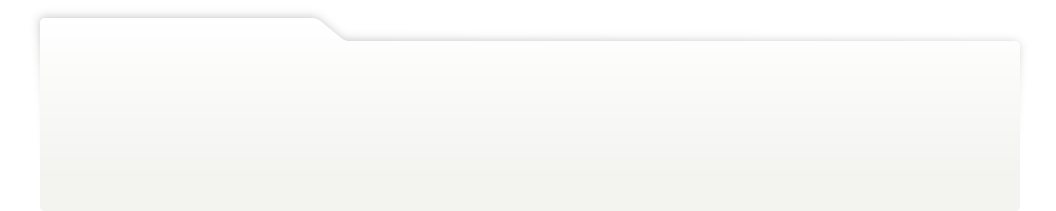
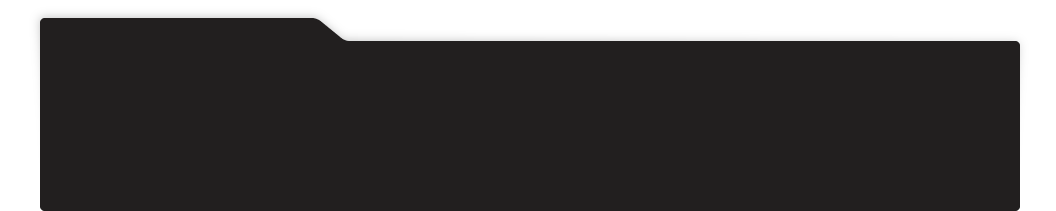
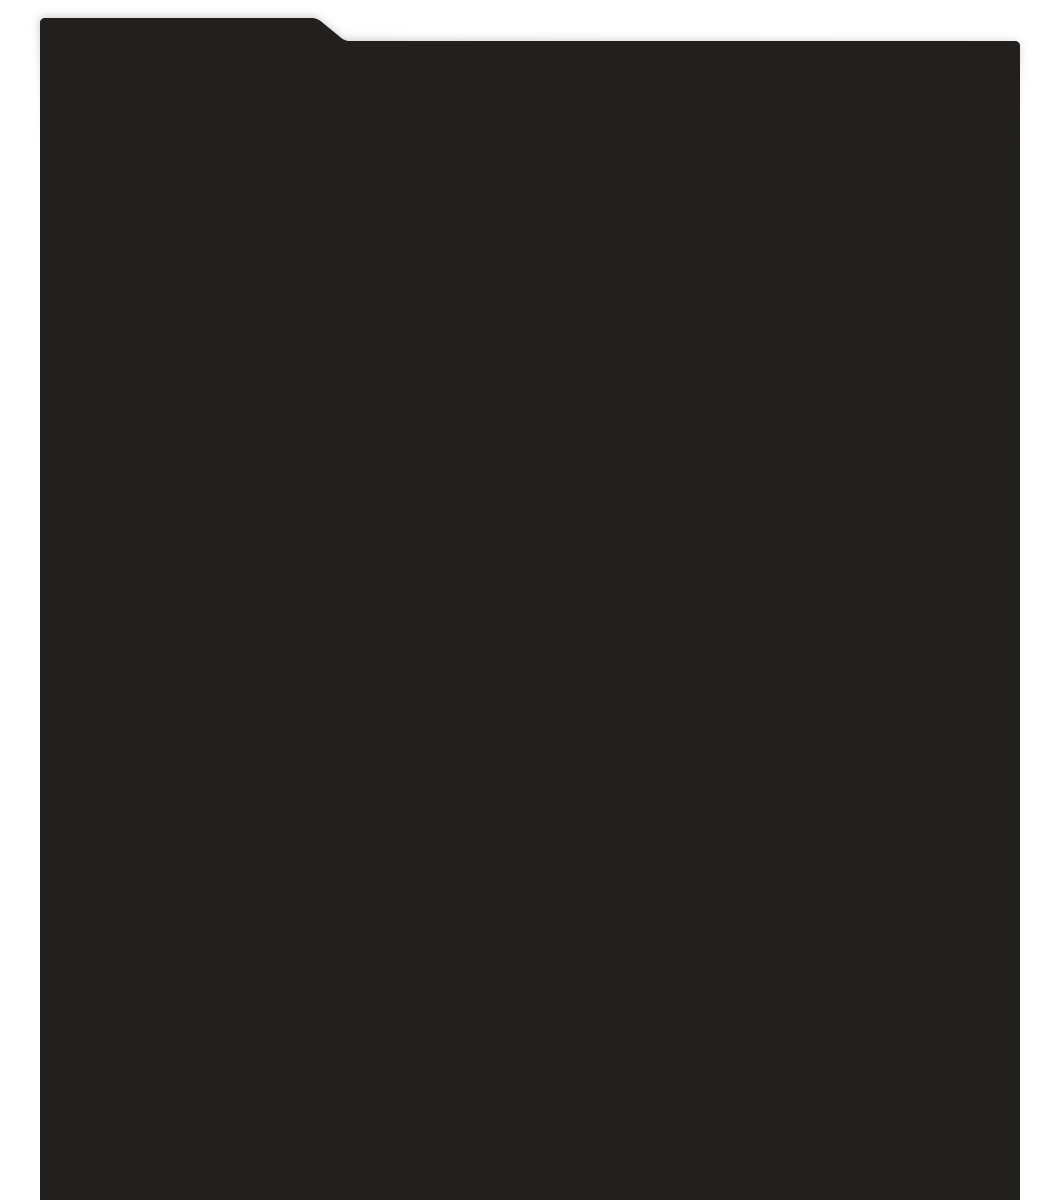
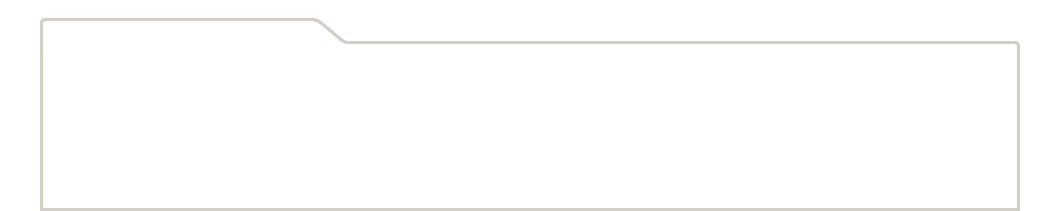
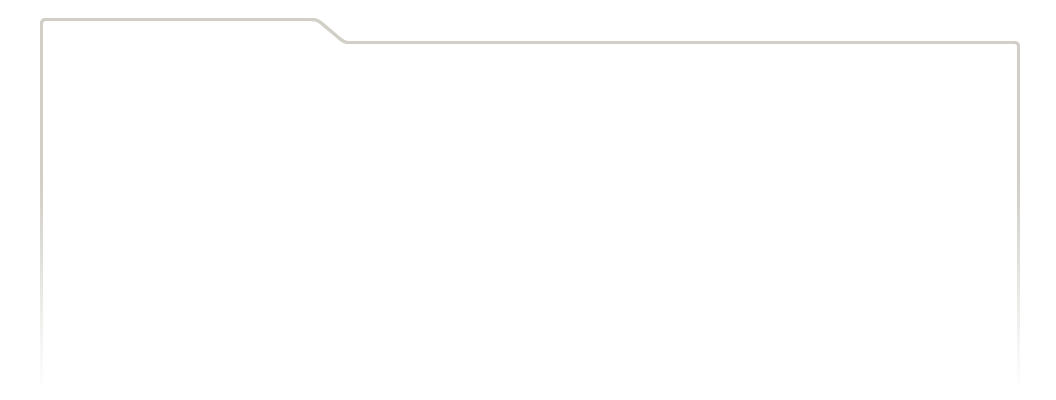
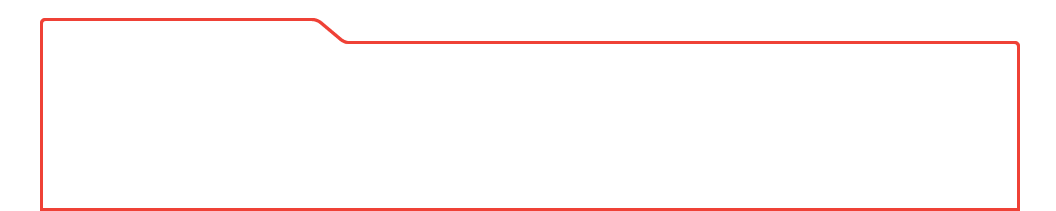
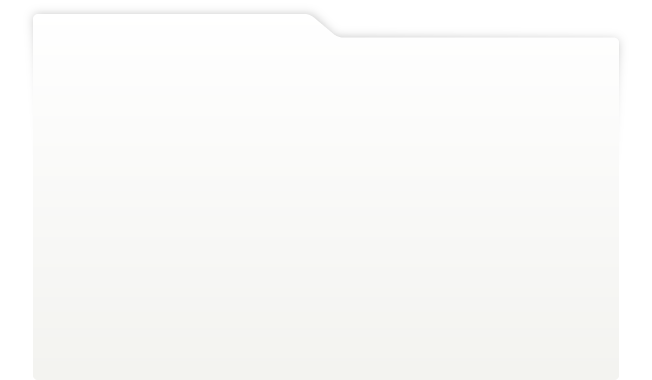
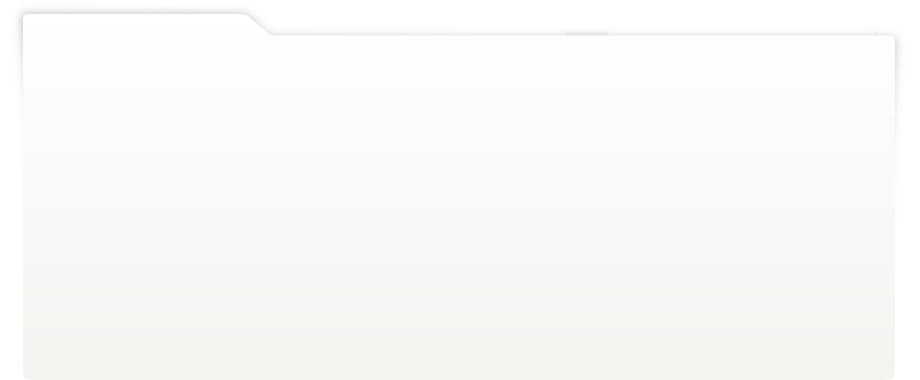
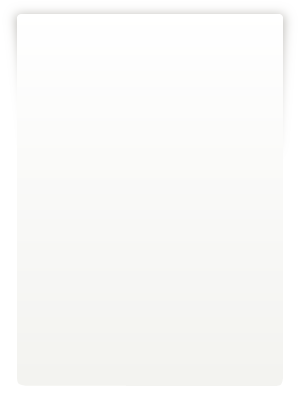
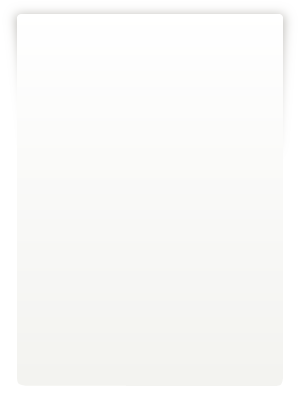
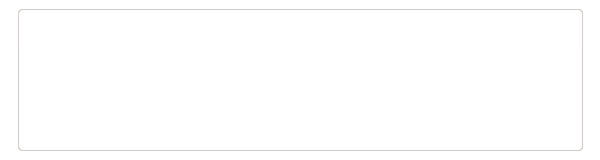
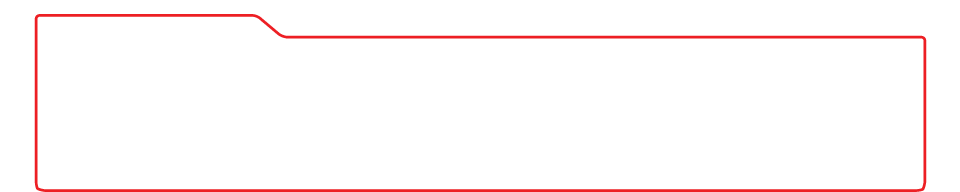
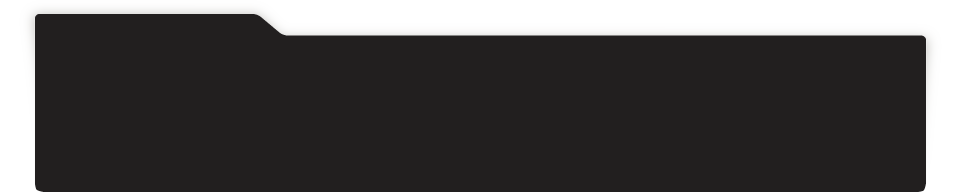
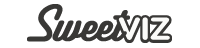
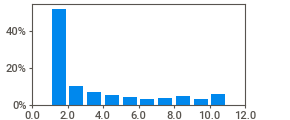
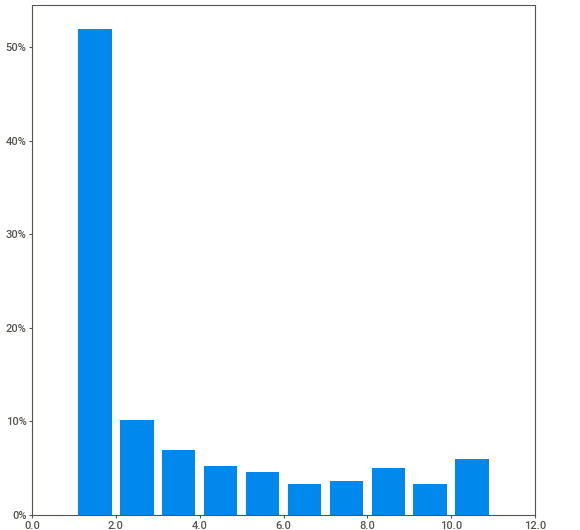
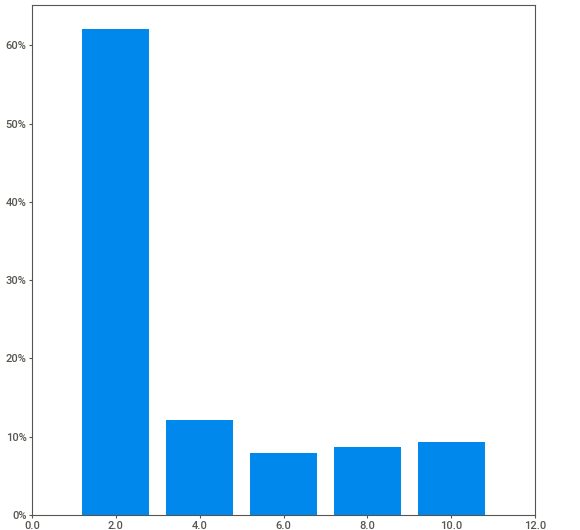
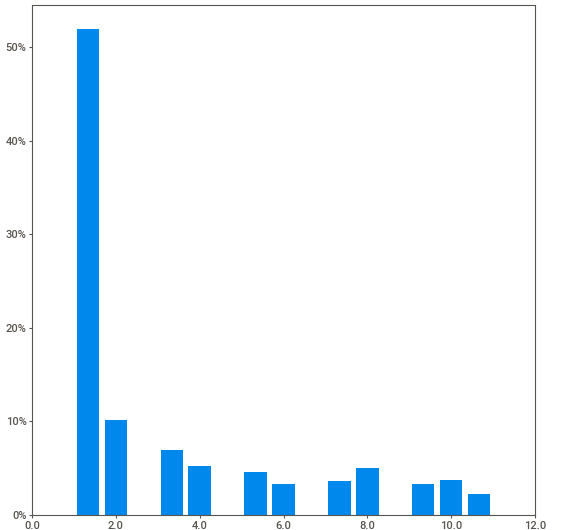
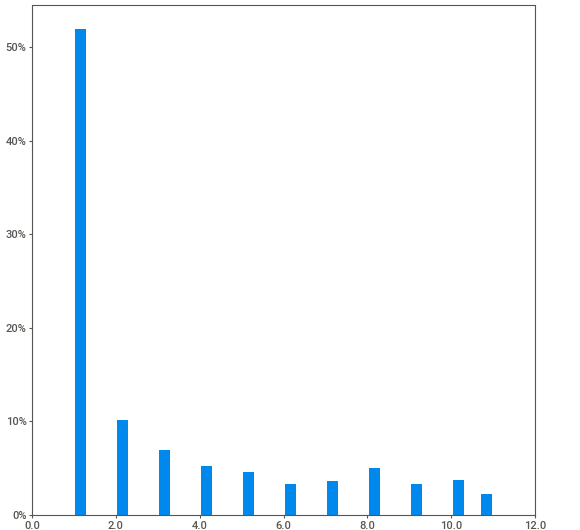
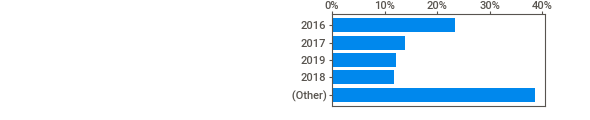
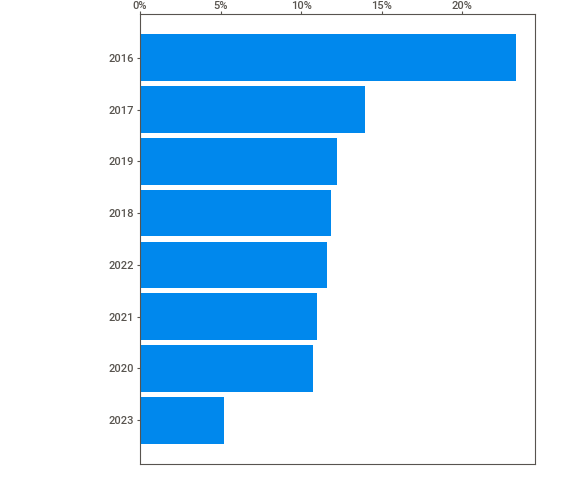
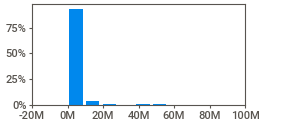
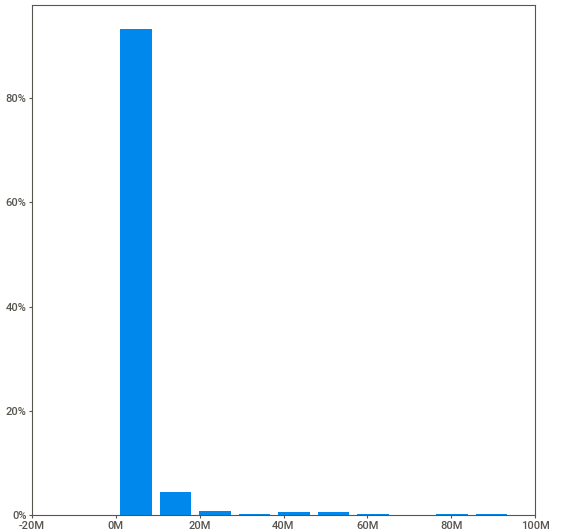
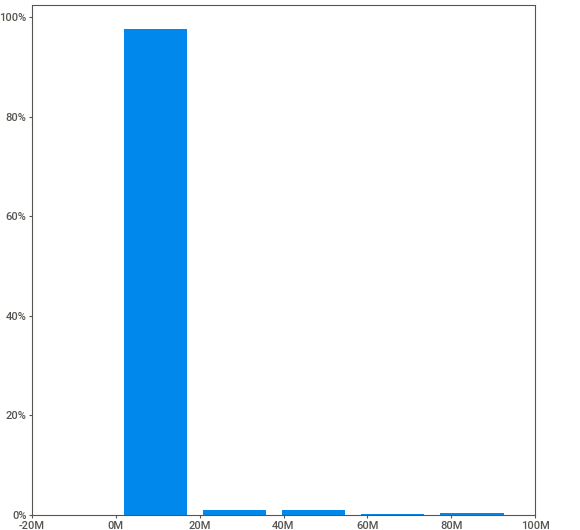
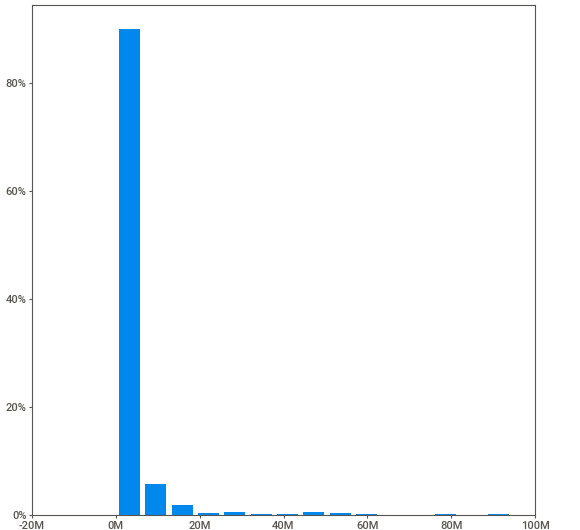
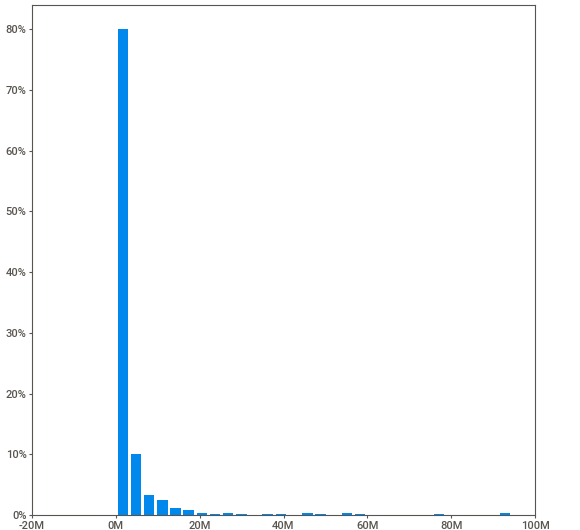
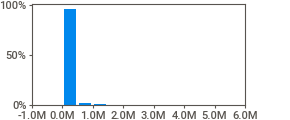
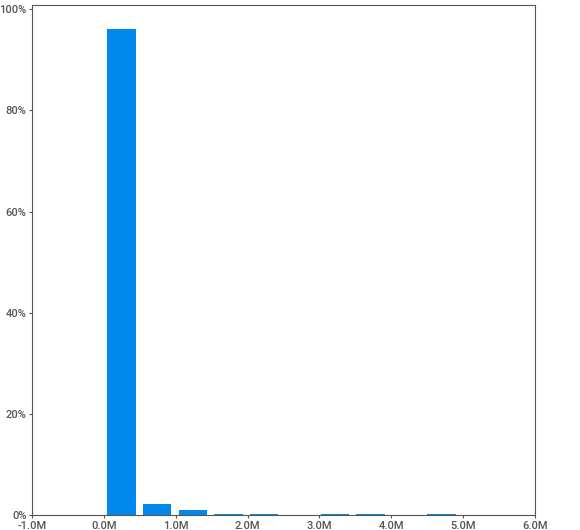
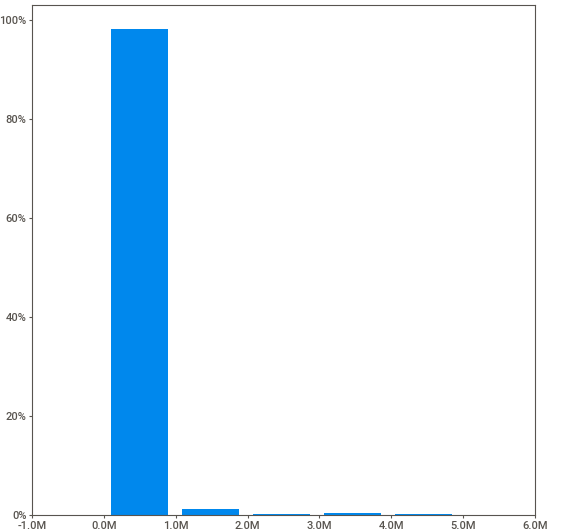
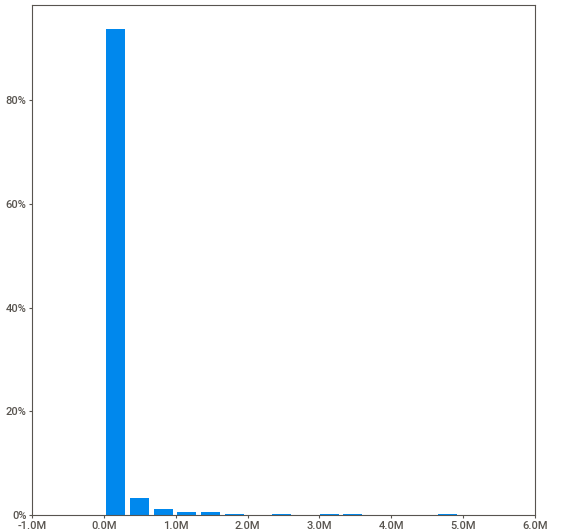
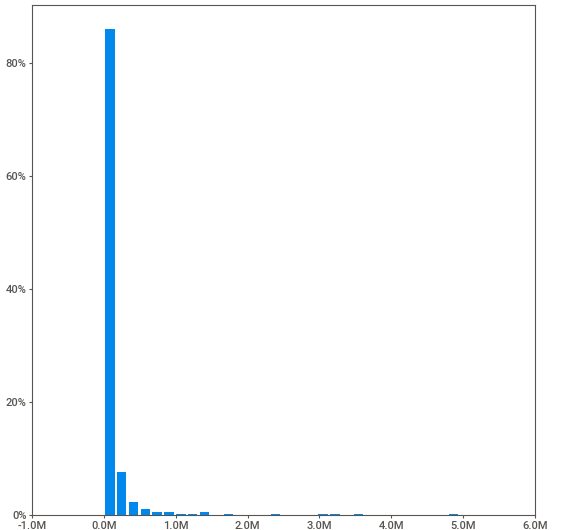
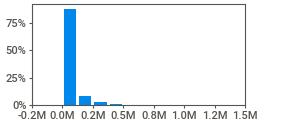
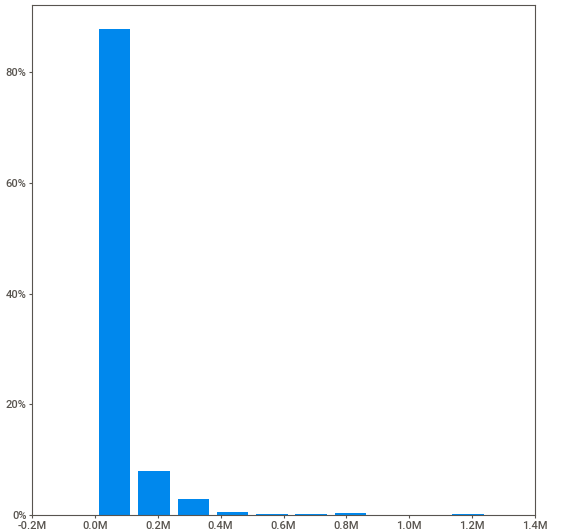
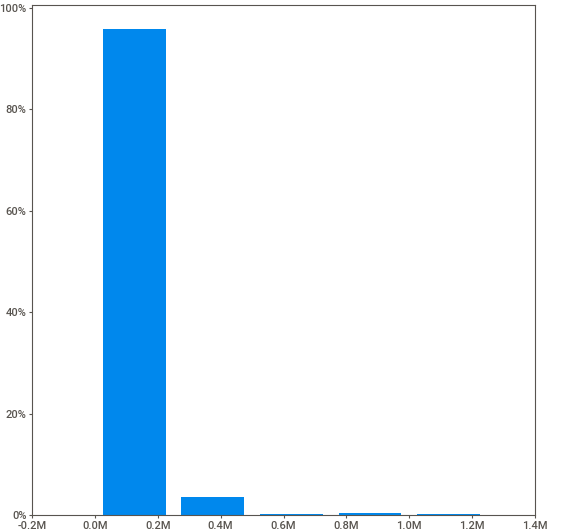
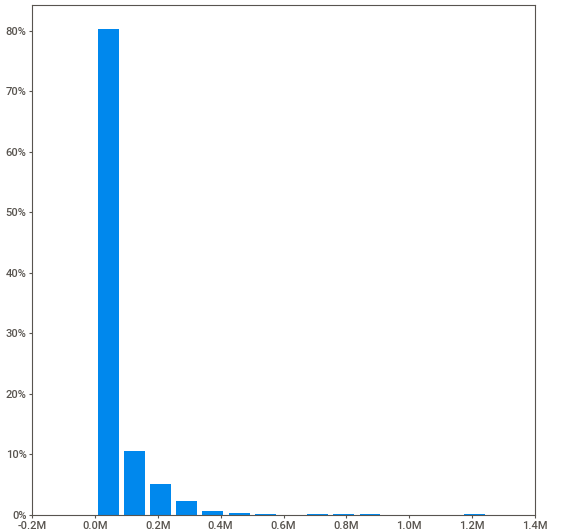
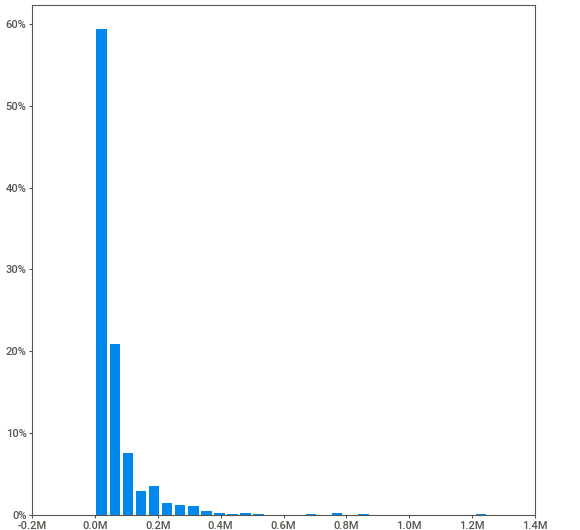
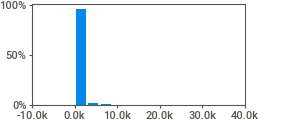
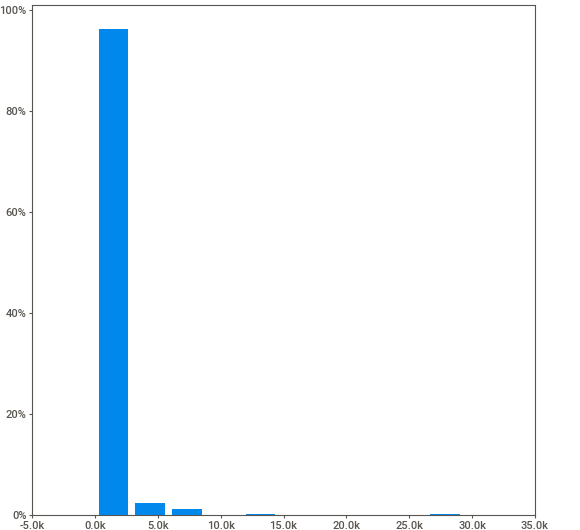
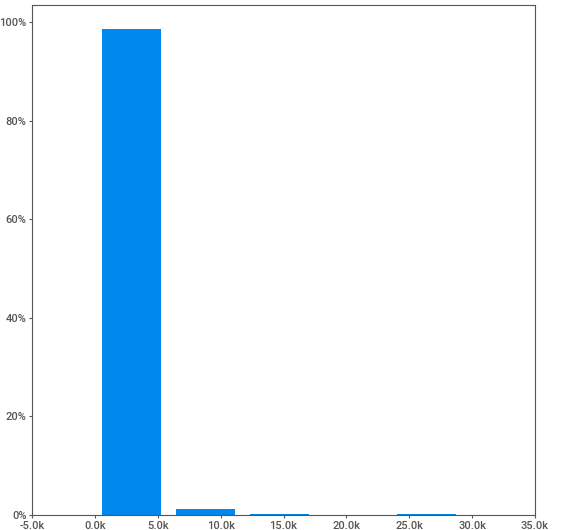
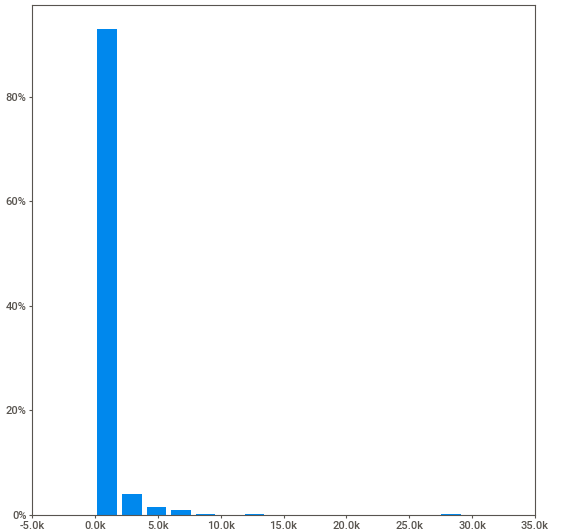
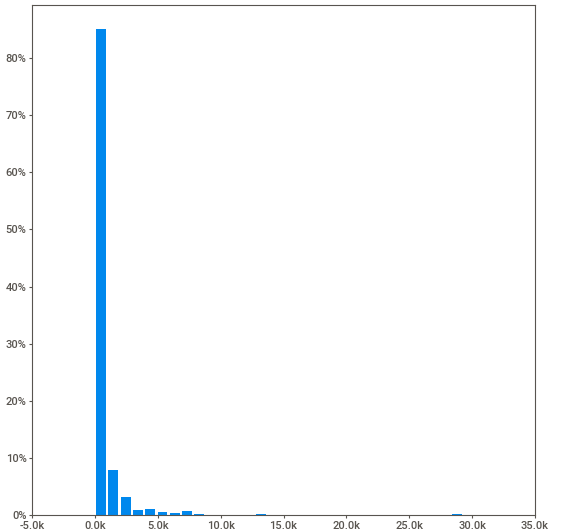
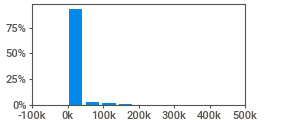
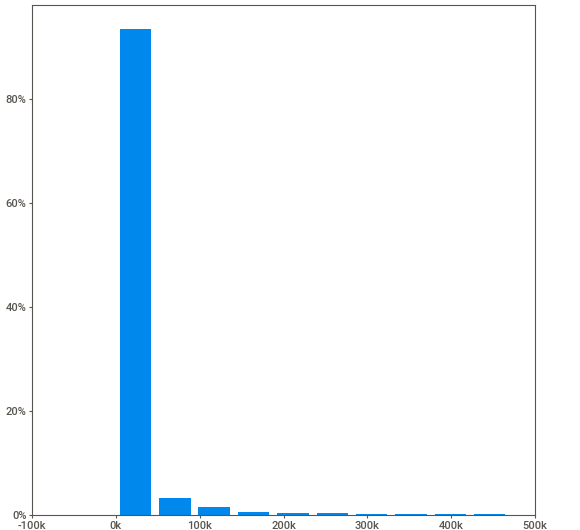
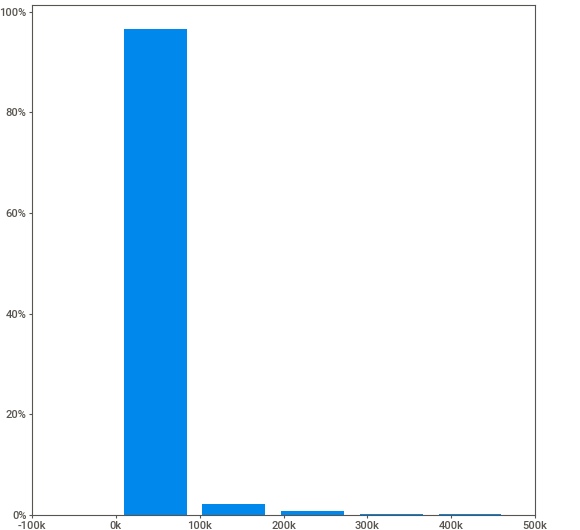
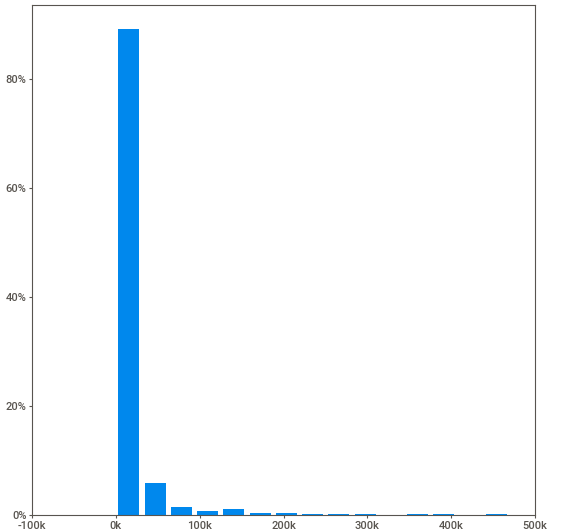
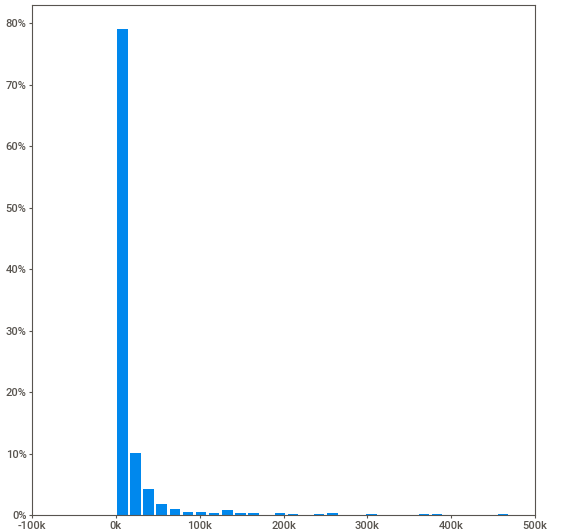
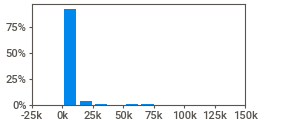
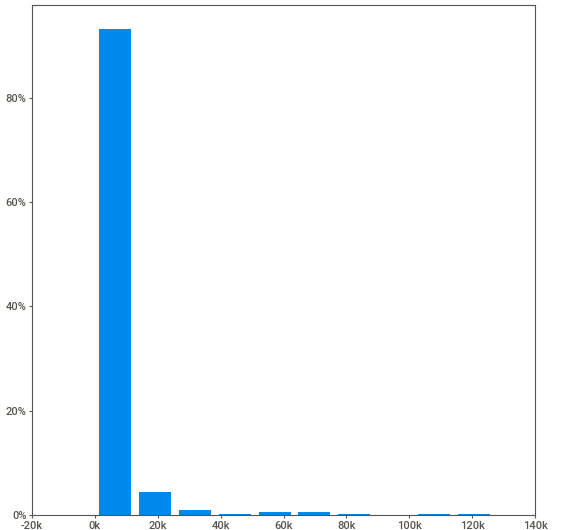
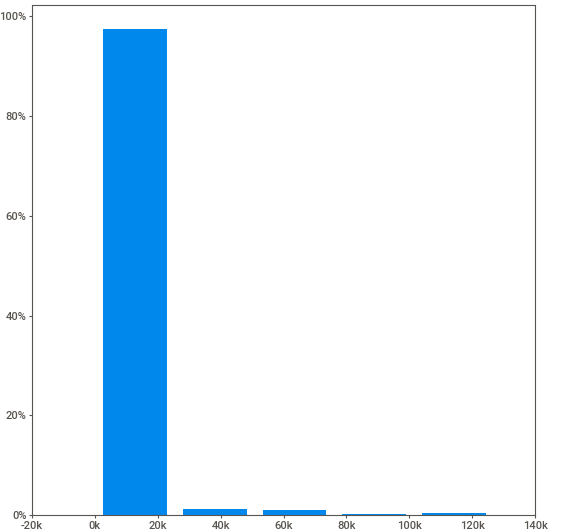
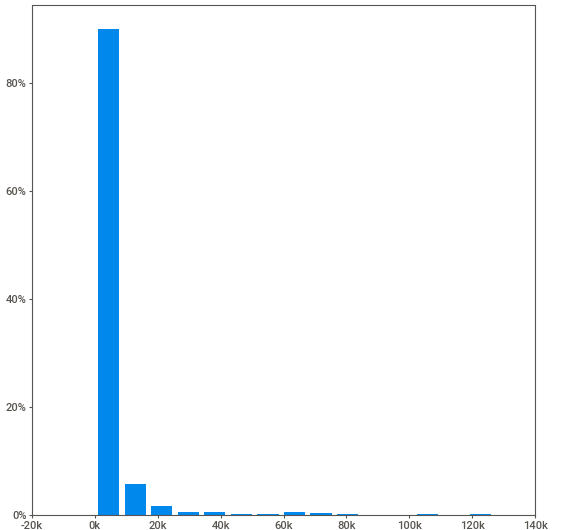
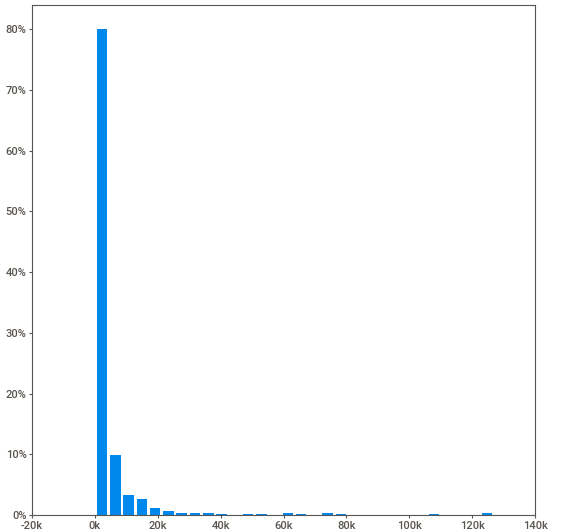
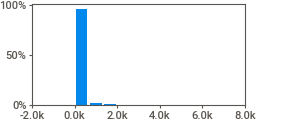
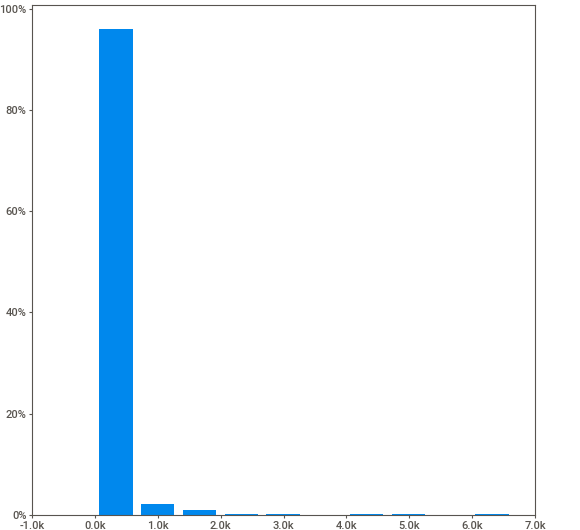
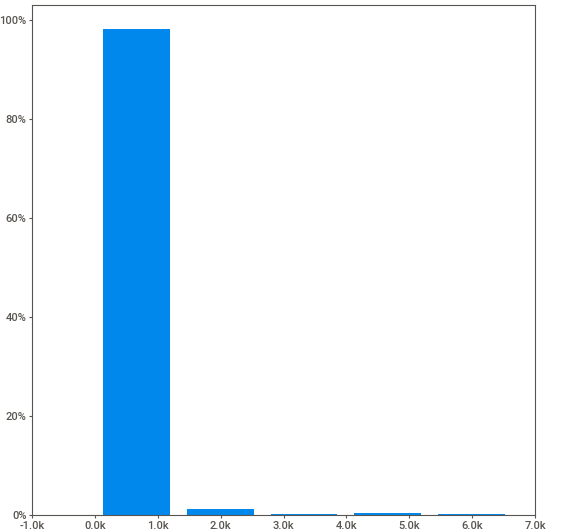
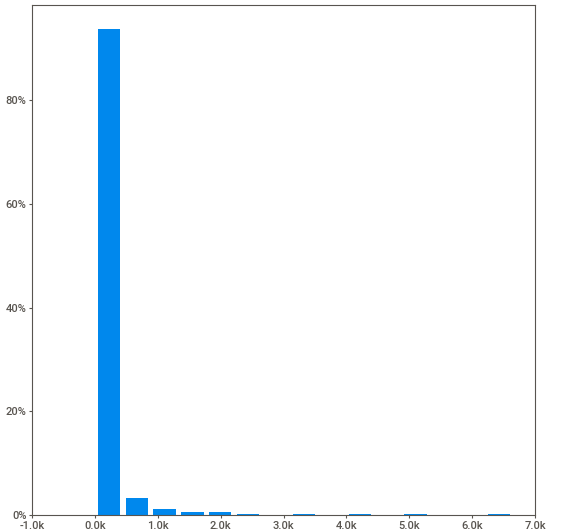
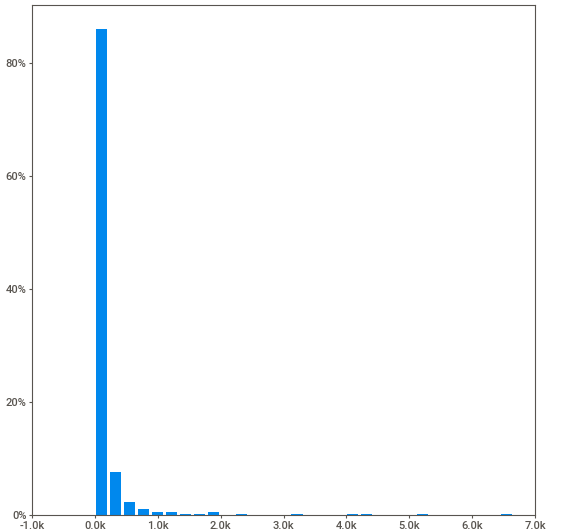
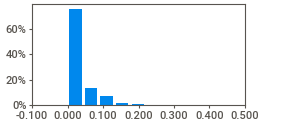
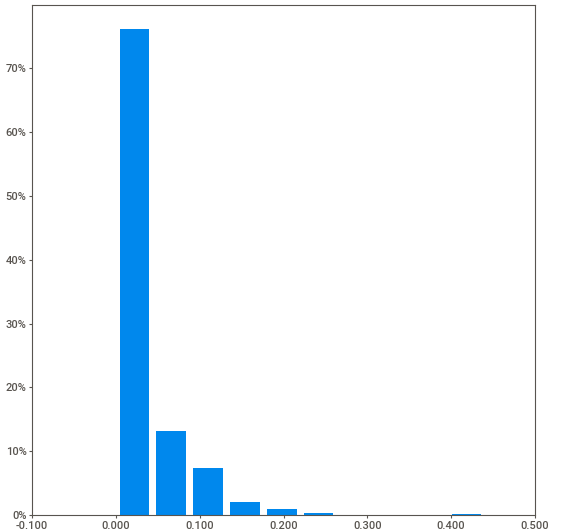
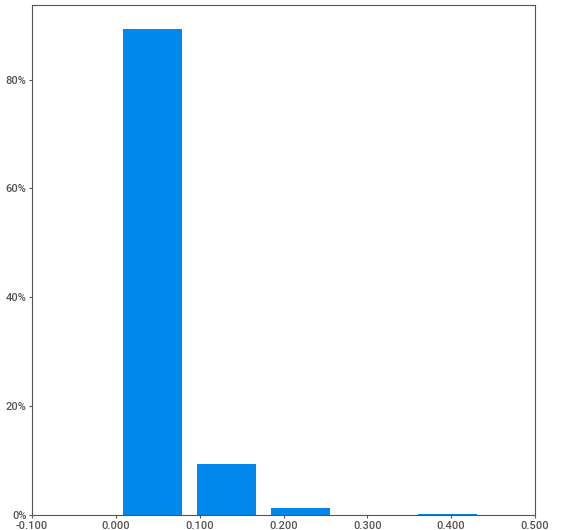
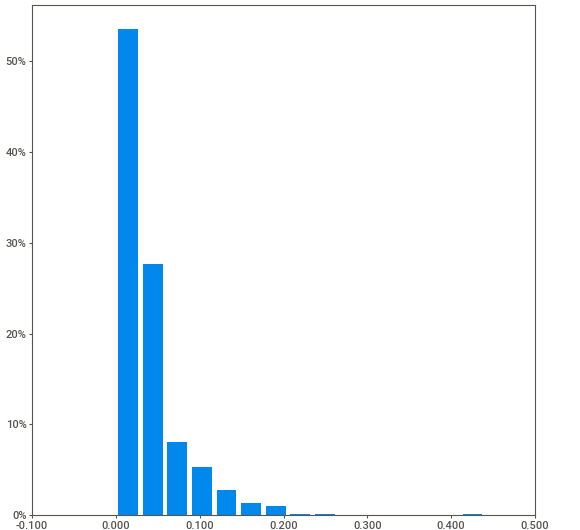
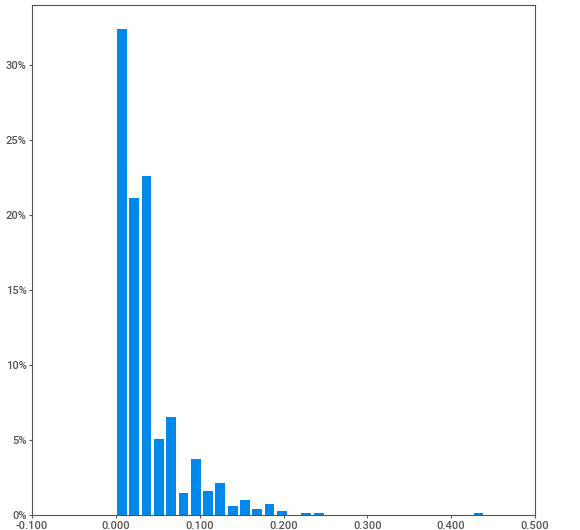
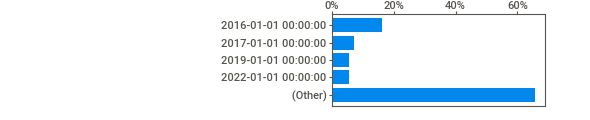
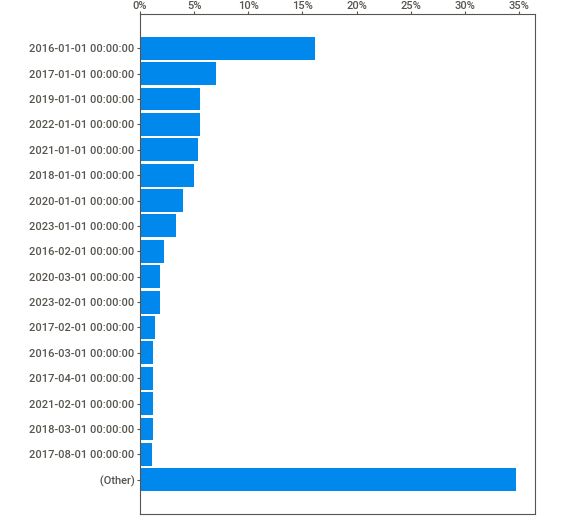
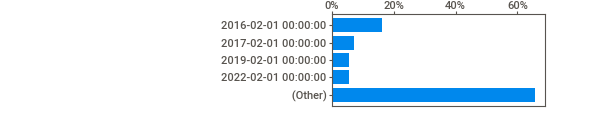
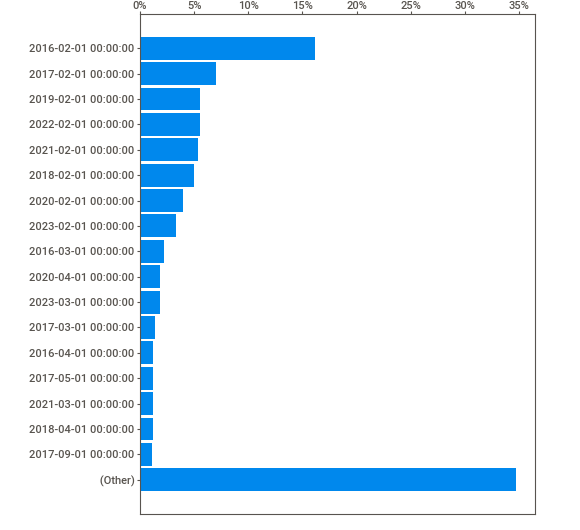
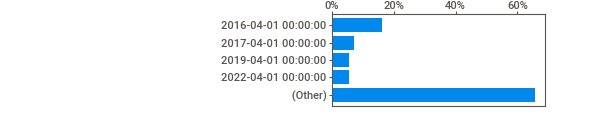
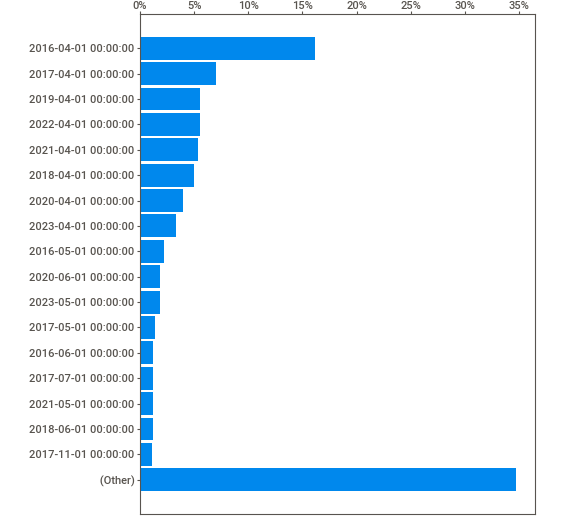
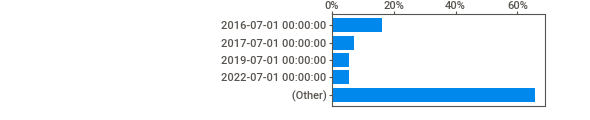
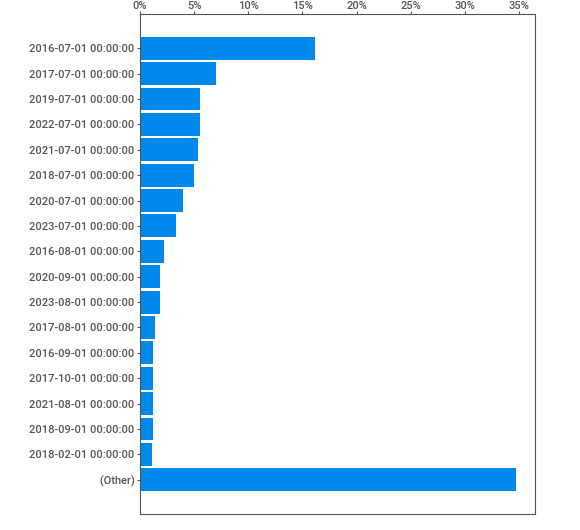
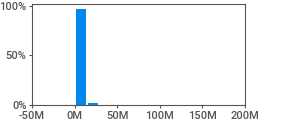
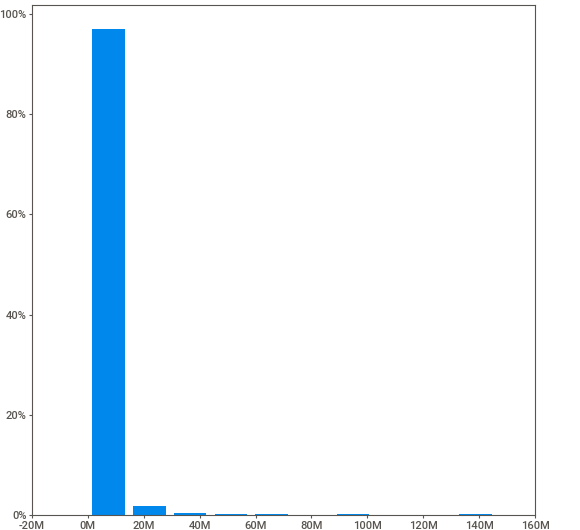
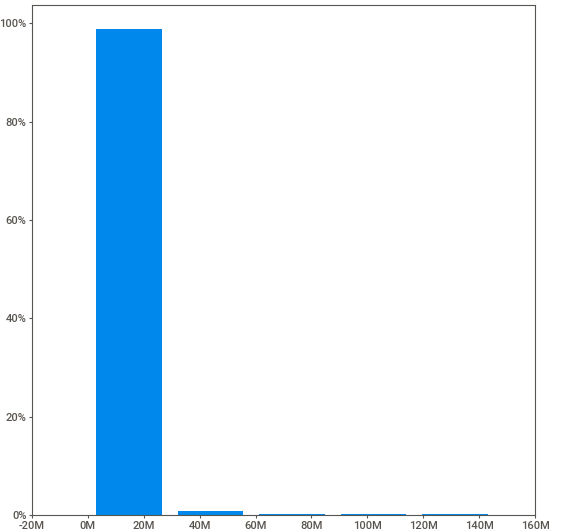
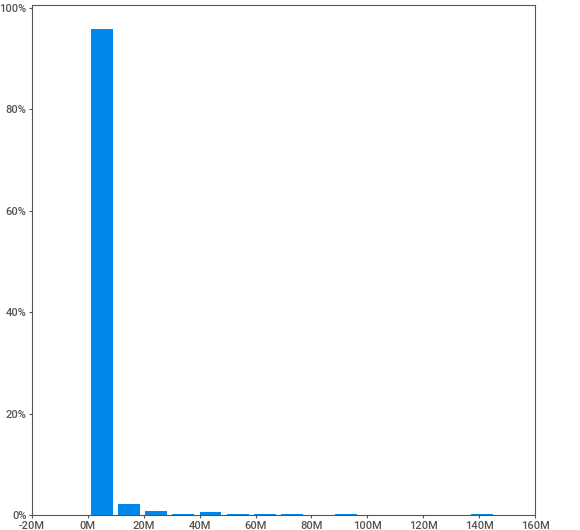
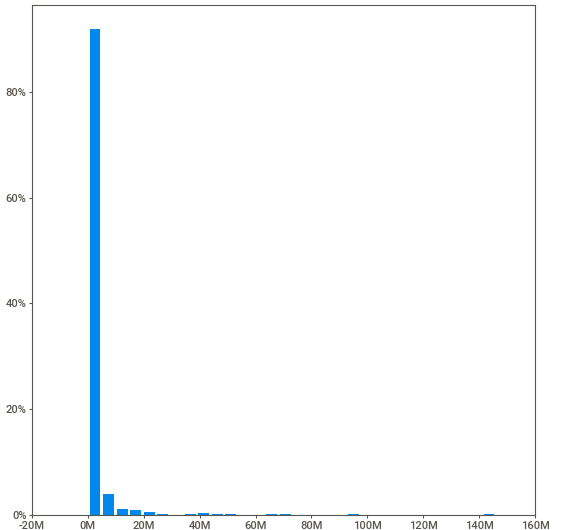
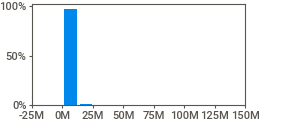
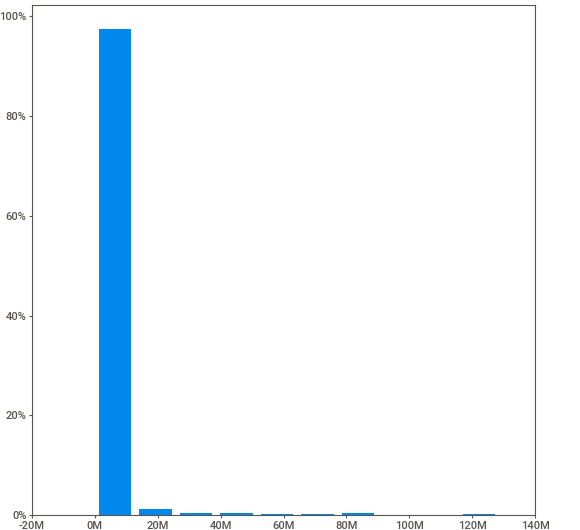
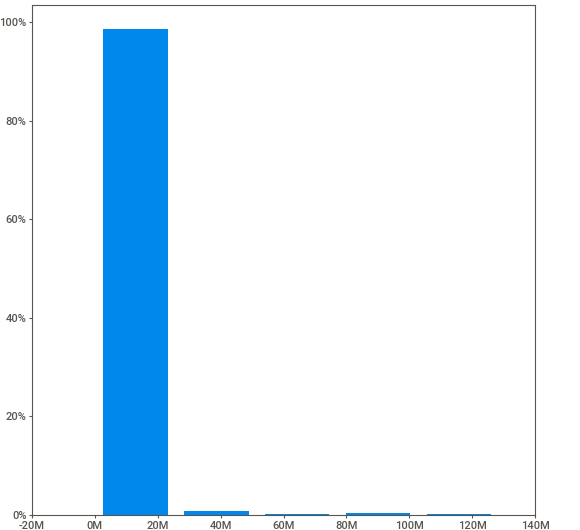
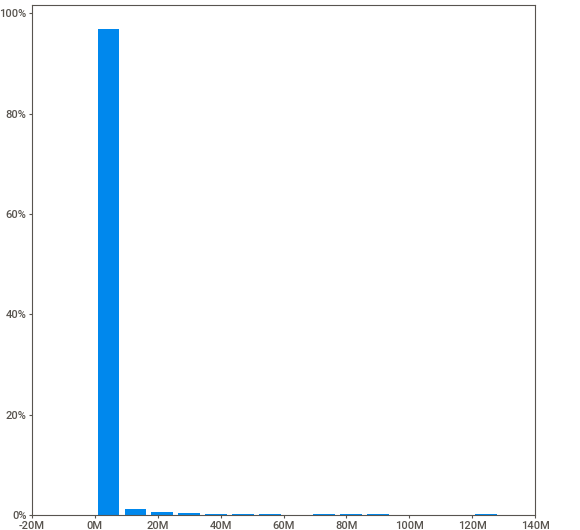
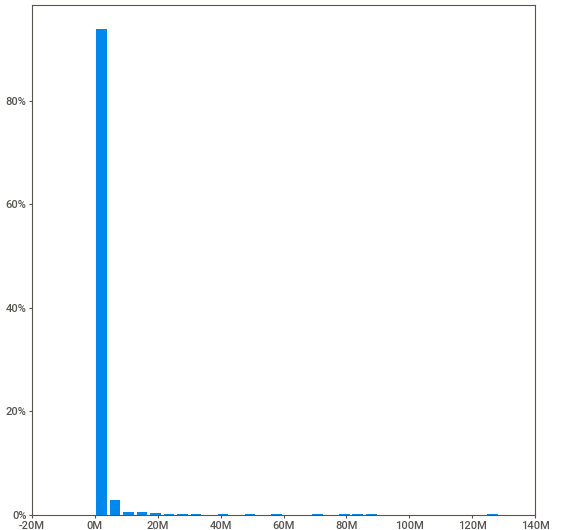
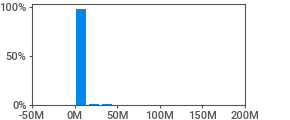
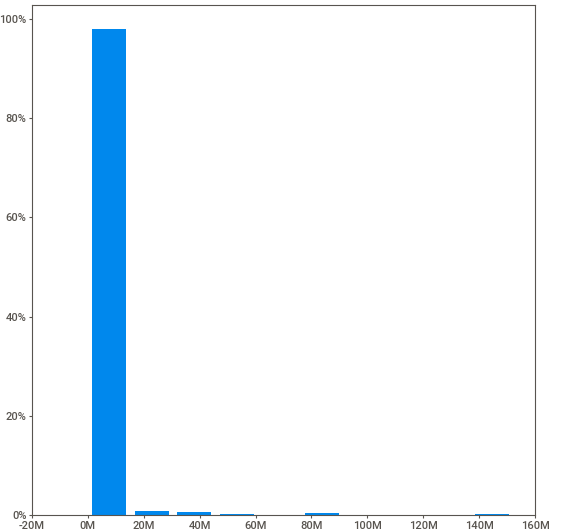
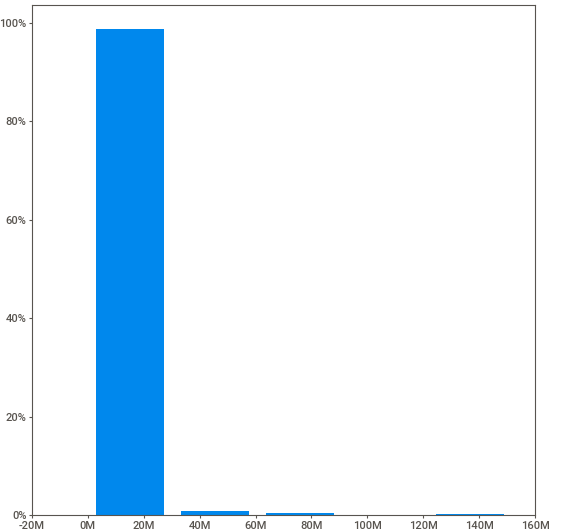
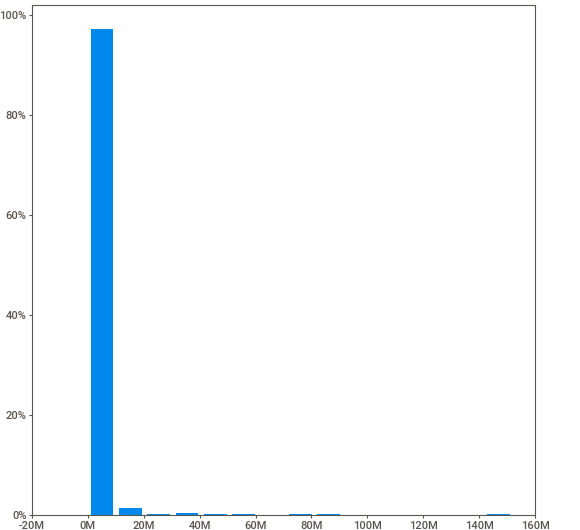
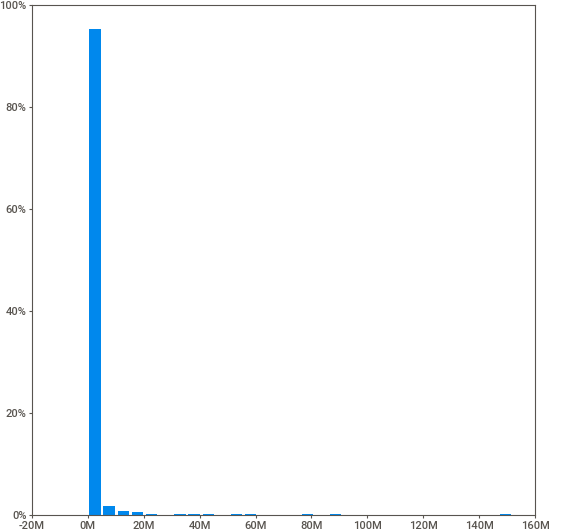
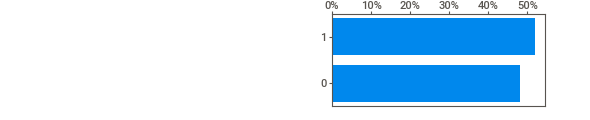
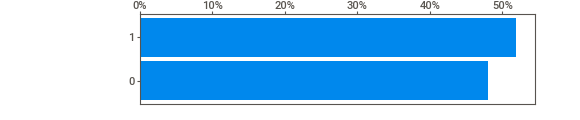
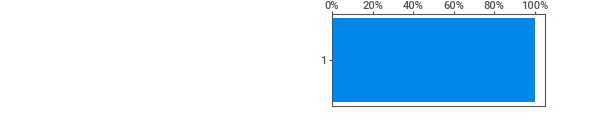
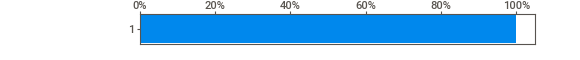
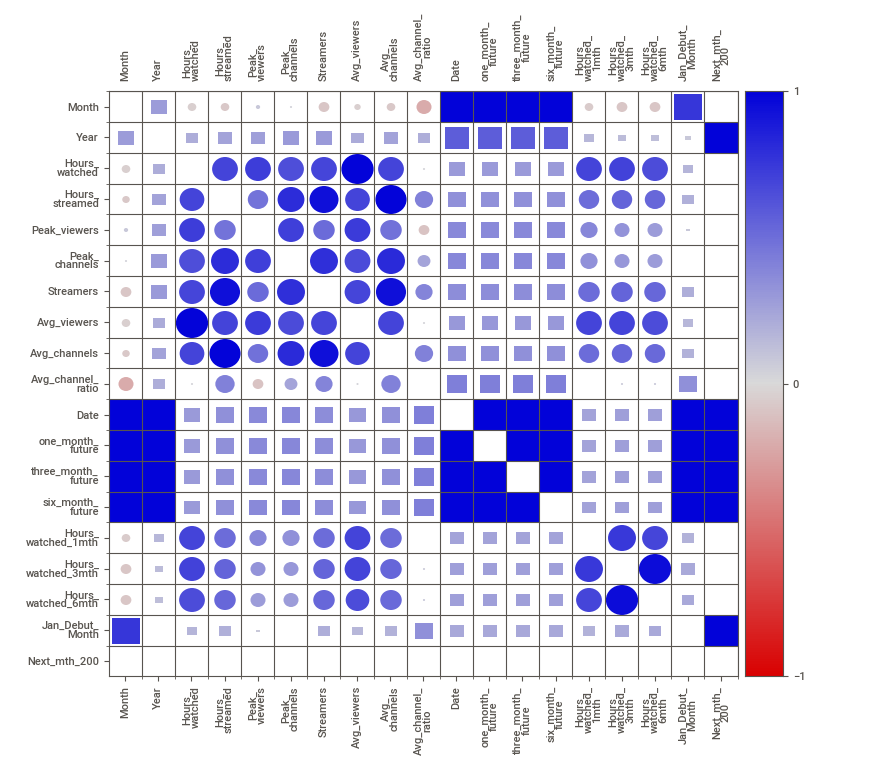
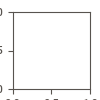

In [117]:
report = sv.analyze(noz_df)
report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

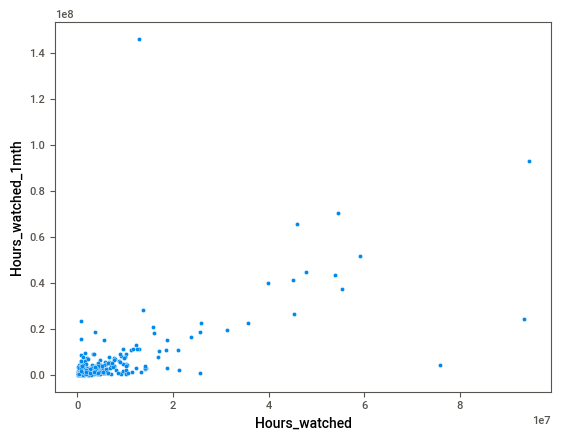

In [118]:
sns.scatterplot(x="Hours_watched", y="Hours_watched_1mth", data=noz_df);

In [125]:
noz_df[noz_df['Hours_watched_1mth'] == noz_df['Hours_watched_1mth'].max()]

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
609,Lost Ark,1,2022,13020879,217772,68925,900,10145,17501.0,293.0,0.02,2022-01-01,2022-02-01,2022-04-01,2022-07-01,145982931,25369445,17390017,1,1


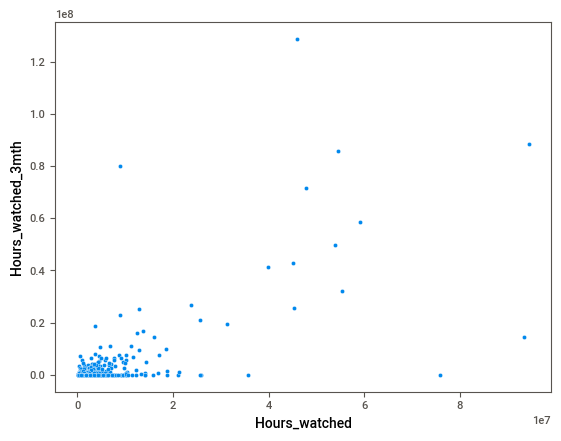

In [126]:
sns.scatterplot(x="Hours_watched", y="Hours_watched_3mth", data=noz_df);

In [127]:
noz_df[noz_df['Hours_watched_3mth'] == noz_df['Hours_watched_3mth'].max()]

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
330,Fortnite,1,2018,45936666,2363181,196517,6418,302468,61743.0,3176.0,0.05,2018-01-01,2018-02-01,2018-04-01,2018-07-01,65693934,128654925,152086231,1,1


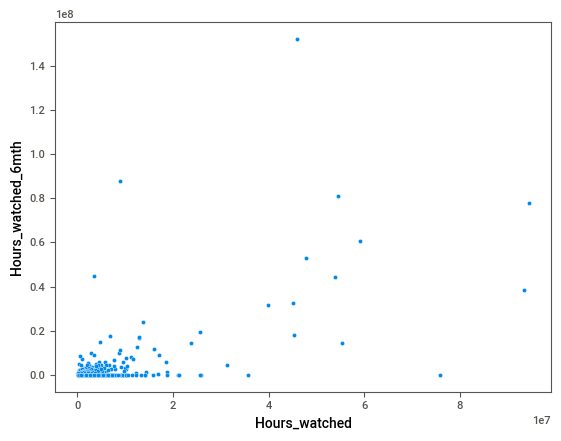

In [128]:
sns.scatterplot(x="Hours_watched", y="Hours_watched_6mth", data=noz_df);

In [129]:
noz_df[noz_df['Hours_watched_6mth'] == noz_df['Hours_watched_6mth'].max()]

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
330,Fortnite,1,2018,45936666,2363181,196517,6418,302468,61743.0,3176.0,0.05,2018-01-01,2018-02-01,2018-04-01,2018-07-01,65693934,128654925,152086231,1,1


In [130]:
noz_df[noz_df['Hours_watched'] == noz_df['Hours_watched'].max()]

,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_channel_ratio,Date,one_month_future,three_month_future,six_month_future,Hours_watched_1mth,Hours_watched_3mth,Hours_watched_6mth,Jan_Debut_Month,Next_mth_200
76,League of Legends,1,2016,94377226,1362044,530270,2903,129172,126851.0,1831.0,0.01,2016-01-01,2016-02-01,2016-04-01,2016-07-01,93154772,88389049,77871713,1,1
